In [11]:
import torch, os
import matplotlib.pyplot as plt, numpy as np
from mlflow_helper import load_attack_results, load_from_db
from itertools import chain

In [3]:
baseline_run_names = [1668278459, 1668279489, 1668283177, 1668284221, 1668289478,
            1668296690, 1668302862, 1668309303, 1668319357, 1668343081, 1668361949,
            1667820145, 1667706428, 1667745011, 1667634222, 1667729890, 1667599289,
            1669374570]

S2CNN_run_names = [1668559990, 1668568059, 1668578286, 1668598496, 1668637573, 1668139362, 1668030960]

NR_NR_run_names = [1671715247, 1671716139, 1671717283, 1671720334, 1671724685, 1671725735, 1671729865,
                   1671742022, 1671748092, 1671760833]

In [4]:
baseline_images = []
baseline_preds = []
baseline_clean_preds = []

for run_name in baseline_run_names:
    baseline_images_, baseline_preds_, baseline_clean_preds_, labels = load_attack_results(run_name, 'LinfProjectedGradientDescentAttack', 'images.pickle')
    baseline_images.append(baseline_images_)
    baseline_preds.append(baseline_preds_)
    baseline_clean_preds.append(baseline_clean_preds_)
    
baseline_success = [load_attack_results(run_name, 'LinfProjectedGradientDescentAttack', 'success.pickle') for run_name in baseline_run_names]
baseline_success_rate = [load_attack_results(run_name, 'LinfProjectedGradientDescentAttack', 'success_rate.pickle') for run_name in baseline_run_names]
baseline_logits = torch.stack([load_attack_results(run_name, 'LinfProjectedGradientDescentAttack', 'logits.pickle') for run_name in baseline_run_names])
baseline_clean_test_accs = [load_from_db(run_name, 'metrics.test_acc') for run_name in baseline_run_names]
baseline_total_params = [load_from_db(run_name, 'params.total_params') for run_name in baseline_run_names]
baseline_params = load_attack_results(baseline_run_names[0], 'LinfProjectedGradientDescentAttack', 'params.pickle')

In [ ]:
S2CNN_images = []
S2CNN_preds = []
S2CNN_clean_preds = []

for run_name in S2CNN_run_names:
    S2CNN_images_, S2CNN_preds_, S2CNN_clean_preds_, labels = load_attack_results(run_name, 'LinfProjectedGradientDescentAttack', 'images.pickle')
    S2CNN_images.append(S2CNN_images_)
    S2CNN_preds.append(S2CNN_preds_)
    S2CNN_clean_preds.append(S2CNN_clean_preds_)
    
S2CNN_success = [load_attack_results(run_name, 'LinfProjectedGradientDescentAttack', 'success.pickle') for run_name in S2CNN_run_names]
S2CNN_success_rate = [load_attack_results(run_name, 'LinfProjectedGradientDescentAttack', 'success_rate.pickle') for run_name in S2CNN_run_names]
S2CNN_logits = torch.stack([load_attack_results(run_name, 'LinfProjectedGradientDescentAttack', 'logits.pickle') for run_name in S2CNN_run_names])
S2CNN_clean_test_accs = [load_from_db(run_name, 'metrics.test_acc') for run_name in S2CNN_run_names]
S2CNN_total_params = [load_from_db(run_name, 'params.total_params') for run_name in S2CNN_run_names]
S2CNN_params = load_attack_results(S2CNN_run_names[0], 'LinfProjectedGradientDescentAttack', 'params.pickle')

In [5]:
NR_NR_images = []
NR_NR_preds = []
NR_NR_clean_preds = []

for run_name in NR_NR_run_names:
    NR_NR_images_, NR_NR_preds_, NR_NR_clean_preds_, labels = load_attack_results(run_name, 'LinfProjectedGradientDescentAttack', 'images.pickle')
    NR_NR_images.append(NR_NR_images_)
    NR_NR_preds.append(NR_NR_preds_)
    NR_NR_clean_preds.append(NR_NR_clean_preds_)
    
NR_NR_success = [load_attack_results(run_name, 'LinfProjectedGradientDescentAttack', 'success.pickle') for run_name in NR_NR_run_names]
NR_NR_success_rate = [load_attack_results(run_name, 'LinfProjectedGradientDescentAttack', 'success_rate.pickle') for run_name in NR_NR_run_names]
NR_NR_logits = torch.stack([load_attack_results(run_name, 'LinfProjectedGradientDescentAttack', 'logits.pickle') for run_name in NR_NR_run_names])
NR_NR_clean_test_accs = [load_from_db(run_name, 'metrics.test_acc') for run_name in NR_NR_run_names]
NR_NR_total_params = [load_from_db(run_name, 'params.total_params') for run_name in NR_NR_run_names]
NR_NR_params = load_attack_results(NR_NR_run_names[0], 'LinfProjectedGradientDescentAttack', 'params.pickle')

In [4]:
print(baseline_params, '\n')
print(baseline_images[0].size(), baseline_preds[0].size(), baseline_clean_preds[0].size(), labels.size(), baseline_success[0].size(), baseline_success_rate[0].size())

{'epsilons': [0, 0.1, 0.25, 0.5, 1, 3, 5, 7.5, 10], 'rel_stepsize': 0.03333333333333333, 'steps': 70, 'random_start': True, 'n_repeat': 3} 

torch.Size([9, 100, 1, 60, 60]) torch.Size([9, 100]) torch.Size([100]) torch.Size([100]) torch.Size([9, 10000]) torch.Size([9])


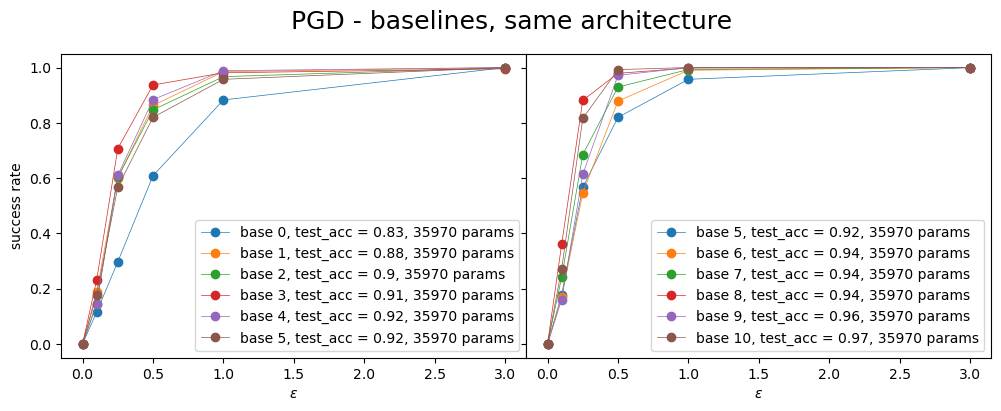

In [6]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize = (12, 4), sharey=True, gridspec_kw={'wspace':0, 'hspace':0})
plt.suptitle('PGD - baselines, same architecture', fontsize=18)
plt.subplots_adjust(top=0.87)

for i in range(6):
    axs[0].plot(baseline_params['epsilons'][:6], baseline_success_rate[i][:6], 'o-', linewidth=0.5, label=f"base {i}, test_acc = {baseline_clean_test_accs[i]:.{2}}, {baseline_total_params[i]} params")
    axs[0].set_xlabel('$\epsilon$')
    axs[0].set_ylabel('success rate')
    
for i in range(5,11):
    axs[1].plot(baseline_params['epsilons'][:6], baseline_success_rate[i][:6], 'o-', linewidth=0.5, label=f"base {i}, test_acc = {baseline_clean_test_accs[i]:.{2}}, {baseline_total_params[i]} params")
    axs[1].set_xlabel('$\epsilon$')

for j in range(2):
    axs[j].legend()

# plt.savefig('PGD_bl_same_arch.pdf', bbox_inches="tight")
plt.show()

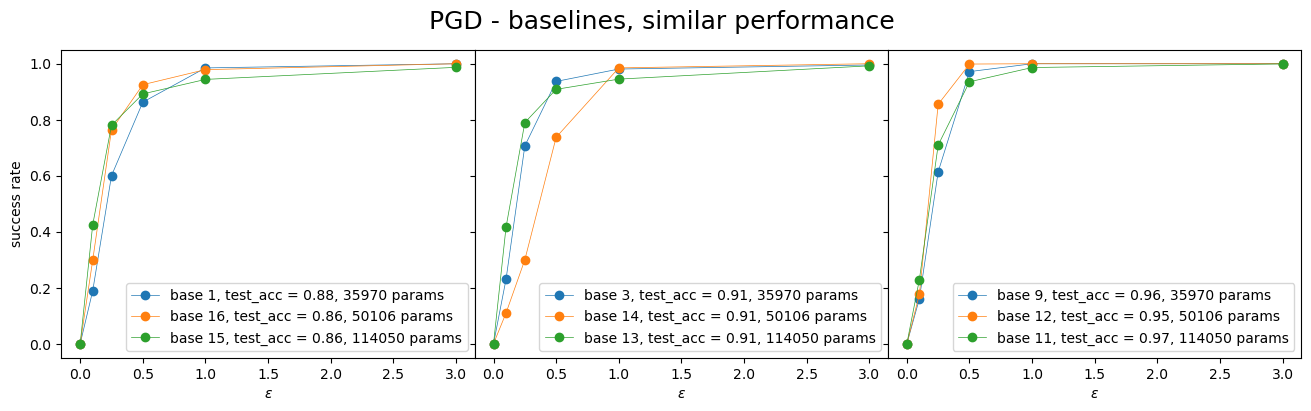

In [7]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize = (16, 4), sharey=True, gridspec_kw={'wspace':0, 'hspace':0})
plt.suptitle('PGD - baselines, similar performance', fontsize=18)
plt.subplots_adjust(top=0.88)

for i in [1, 16, 15]:
    axs[0].plot(baseline_params['epsilons'][:6], baseline_success_rate[i][:6], 'o-', linewidth=0.5, label=f"base {i}, test_acc = {baseline_clean_test_accs[i]:.{2}}, {baseline_total_params[i]} params")
    axs[0].set_xlabel('$\epsilon$')
    axs[0].set_ylabel('success rate')

for i in [3, 14, 13]:
    axs[1].plot(baseline_params['epsilons'][:6], baseline_success_rate[i][:6], 'o-', linewidth=0.5, label=f"base {i}, test_acc = {baseline_clean_test_accs[i]:.{2}}, {baseline_total_params[i]} params")
    axs[1].set_xlabel('$\epsilon$')

for i in [9, 12, 11]:
    axs[2].plot(baseline_params['epsilons'][:6], baseline_success_rate[i][:6], 'o-', linewidth=0.5, label=f"base {i}, test_acc = {baseline_clean_test_accs[i]:.{2}}, {baseline_total_params[i]} params")
    axs[2].set_xlabel('$\epsilon$')

for j in range(3):
    axs[j].legend()

# plt.savefig('PGD_bl_sim_perf.pdf', bbox_inches="tight")
plt.show()

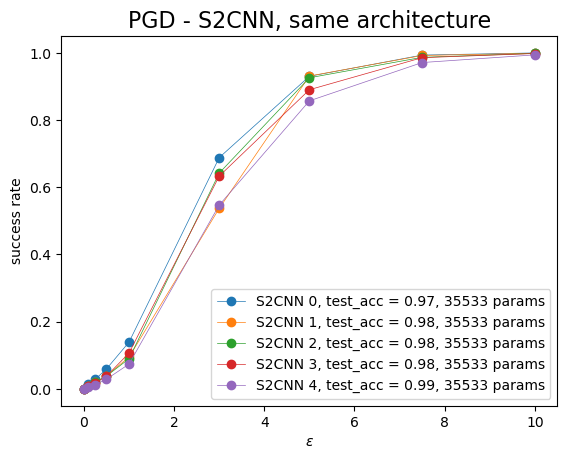

In [8]:
plt.title('PGD - S2CNN, same architecture', fontsize=16)
for i in range(5):
    plt.plot(S2CNN_params['epsilons'], S2CNN_success_rate[i], 'o-', linewidth=0.5, label=f"S2CNN {i}, test_acc = {S2CNN_clean_test_accs[i]:.{2}}, {S2CNN_total_params[i]} params")
plt.xlabel('$\epsilon$')
plt.ylabel('success rate')
plt.legend()
# plt.savefig('PGD_S2CNN_same_arch.pdf', bbox_inches="tight")
plt.show()

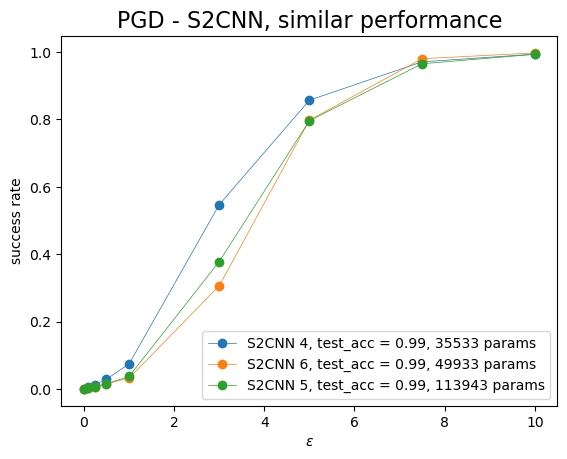

In [9]:
plt.title('PGD - S2CNN, similar performance', fontsize=16)
for i in [4,6,5]:
    plt.plot(S2CNN_params['epsilons'], S2CNN_success_rate[i], 'o-', linewidth=0.5, label=f"S2CNN {i}, test_acc = {S2CNN_clean_test_accs[i]:.{2}}, {S2CNN_total_params[i]} params")
plt.xlabel('$\epsilon$')
plt.ylabel('success rate')
plt.legend()
# plt.savefig('PGD_S2CNN_sim_perf.pdf', bbox_inches="tight")
plt.show()

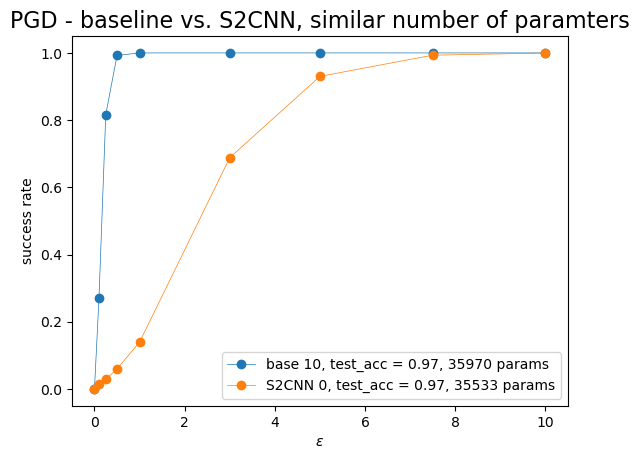

In [10]:
plt.title('PGD - baseline vs. S2CNN, similar number of paramters', fontsize=16)
plt.plot(baseline_params['epsilons'], baseline_success_rate[10], 'o-', linewidth=0.5, label=f"base {10}, test_acc = {baseline_clean_test_accs[10]:.{2}}, {baseline_total_params[10]} params")
plt.plot(S2CNN_params['epsilons'], S2CNN_success_rate[0], 'o-', linewidth=0.5, label=f"S2CNN {0}, test_acc = {S2CNN_clean_test_accs[0]:.{2}}, {S2CNN_total_params[0]} params")
plt.xlabel('$\epsilon$')
plt.ylabel('success rate')
plt.legend()
# plt.savefig('PGD_bl_vs_S2CNN_sim_params.pdf', bbox_inches="tight")
plt.show()

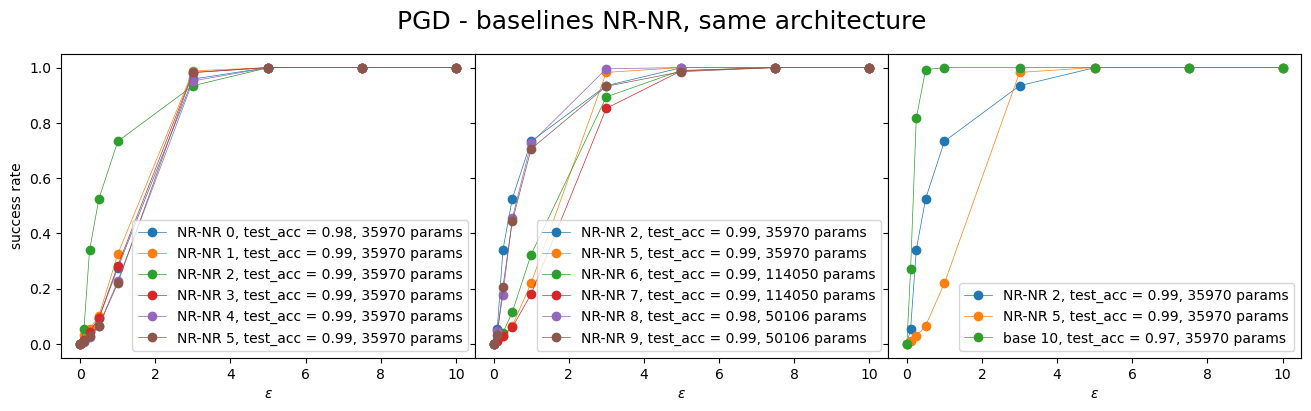

In [12]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize = (16, 4), sharey=True, gridspec_kw={'wspace':0, 'hspace':0})
plt.suptitle('PGD - baselines NR-NR, same architecture', fontsize=18)
plt.subplots_adjust(top=0.87)

for i in range(6):
    axs[0].plot(NR_NR_params['epsilons'], NR_NR_success_rate[i], 'o-', linewidth=0.5, label=f"NR-NR {i}, test_acc = {NR_NR_clean_test_accs[i]:.{2}}, {NR_NR_total_params[i]} params")
    axs[0].set_xlabel('$\epsilon$')
    axs[0].set_ylabel('success rate')
    
for i in chain([2], range(5,10)):
    axs[1].plot(NR_NR_params['epsilons'], NR_NR_success_rate[i], 'o-', linewidth=0.5, label=f"NR-NR {i}, test_acc = {NR_NR_clean_test_accs[i]:.{2}}, {NR_NR_total_params[i]} params")
    axs[1].set_xlabel('$\epsilon$')
    
for i in [2,5]:
    axs[2].plot(NR_NR_params['epsilons'], NR_NR_success_rate[i], 'o-', linewidth=0.5, label=f"NR-NR {i}, test_acc = {NR_NR_clean_test_accs[i]:.{2}}, {NR_NR_total_params[i]} params")
    axs[2].set_xlabel('$\epsilon$')
for i in [10]:
    axs[2].plot(baseline_params['epsilons'], baseline_success_rate[i], 'o-', linewidth=0.5, label=f"base {i}, test_acc = {baseline_clean_test_accs[i]:.{2}}, {baseline_total_params[i]} params")
    axs[2].set_xlabel('$\epsilon$')

for j in range(3):
    axs[j].legend()


plt.show()

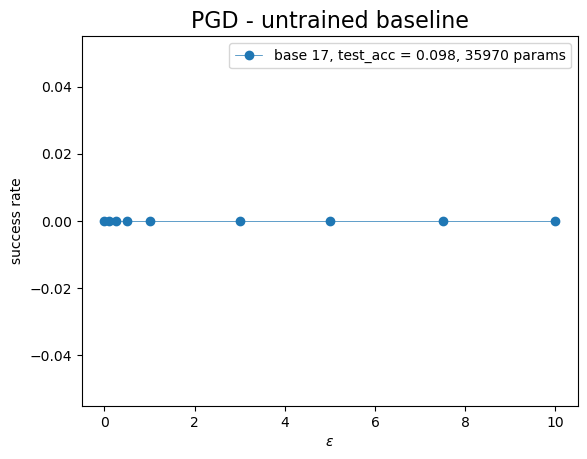

In [11]:
plt.title('PGD - untrained baseline', fontsize=16)
for i in [17]:
    plt.plot(baseline_params['epsilons'], baseline_success_rate[i], 'o-', linewidth=0.5, label=f"base {i}, test_acc = {baseline_clean_test_accs[i]:.{2}}, {baseline_total_params[i]} params")
plt.xlabel('$\epsilon$')
plt.ylabel('success rate')
plt.legend()

plt.show()

In [12]:
def get_probs(logits):
    softmax = torch.nn.Softmax(dim=-1)
    return softmax(logits)

In [13]:
baseline_probs = get_probs(baseline_logits)
S2CNN_probs = get_probs(S2CNN_logits)

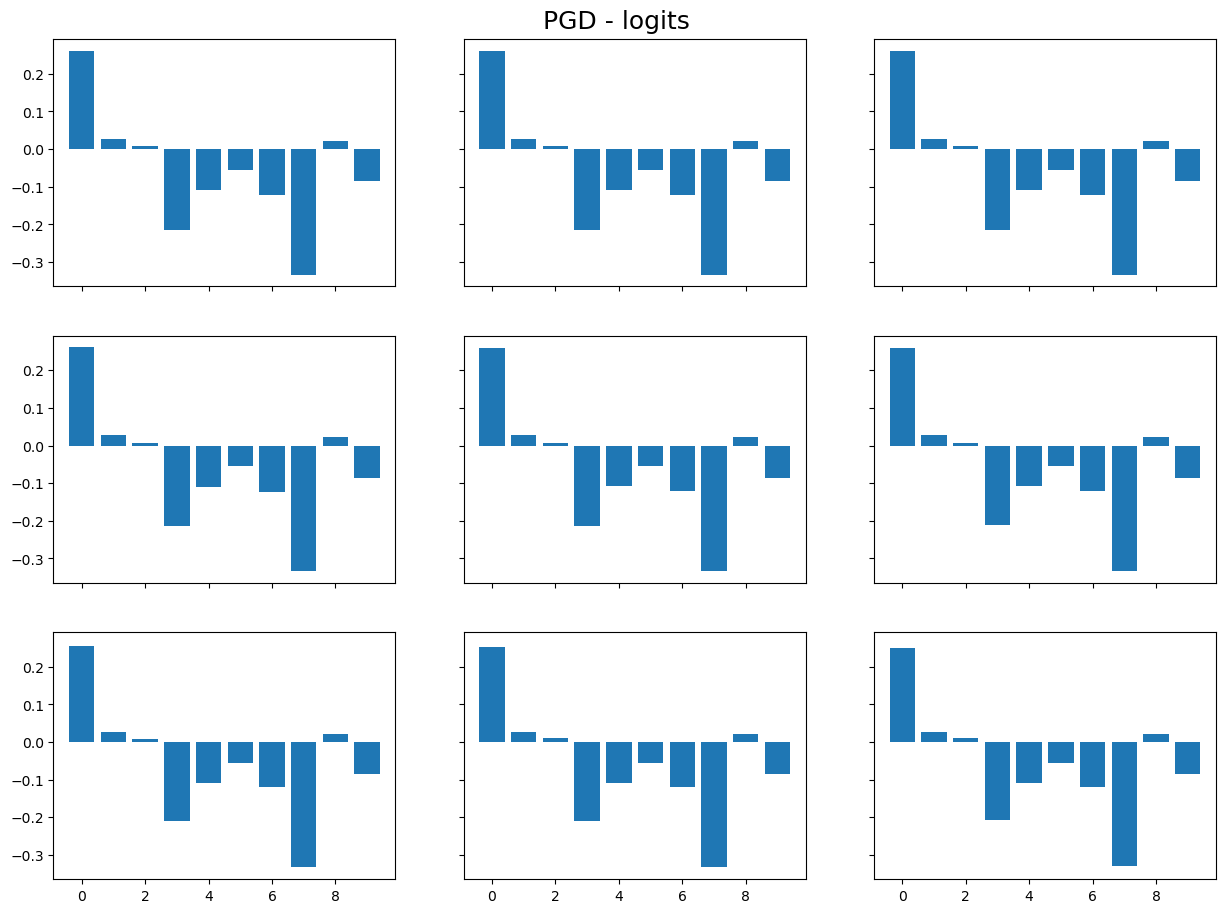

In [21]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize = (15, 10), sharex=True, sharey=True, gridspec_kw={'wspace':0.2, 'hspace':0.2})
plt.suptitle('PGD - logits', fontsize=18)
plt.subplots_adjust(top=0.95)

for i in range(9):
    axs[i//3,i%3].bar(torch.arange(10), baseline_logits[-1,i,3])

plt.show()

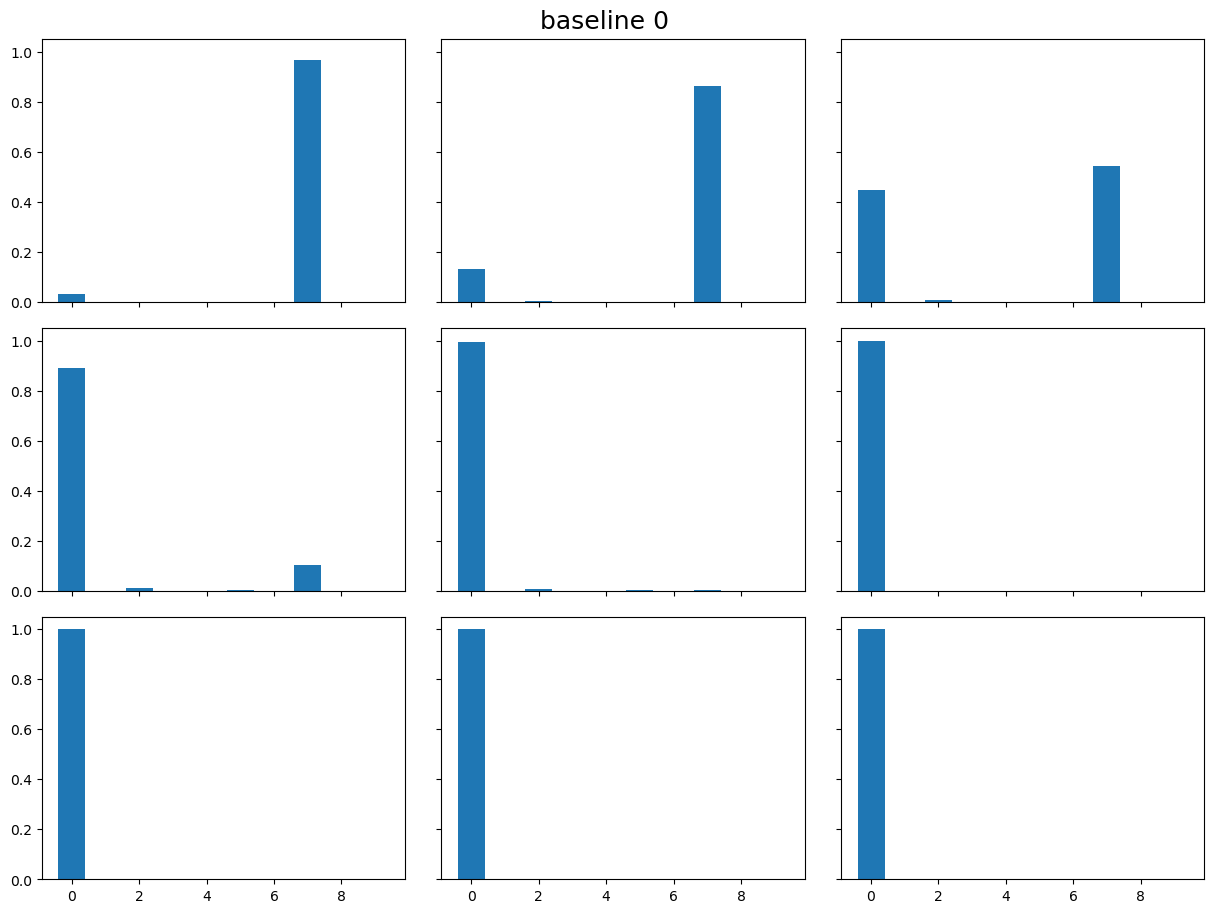

In [24]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize = (15, 10), sharex=True, sharey=True, gridspec_kw={'wspace':0.1, 'hspace':0.1})
plt.suptitle(f'baseline 0', fontsize=18)
plt.subplots_adjust(top=0.95)
for i in range(9):
    axs[i//3,i%3].bar(torch.arange(10), baseline_probs[0,i,0])
    
# plt.savefig('PGD_bl_probs.pdf', bbox_inches="tight")
plt.show()

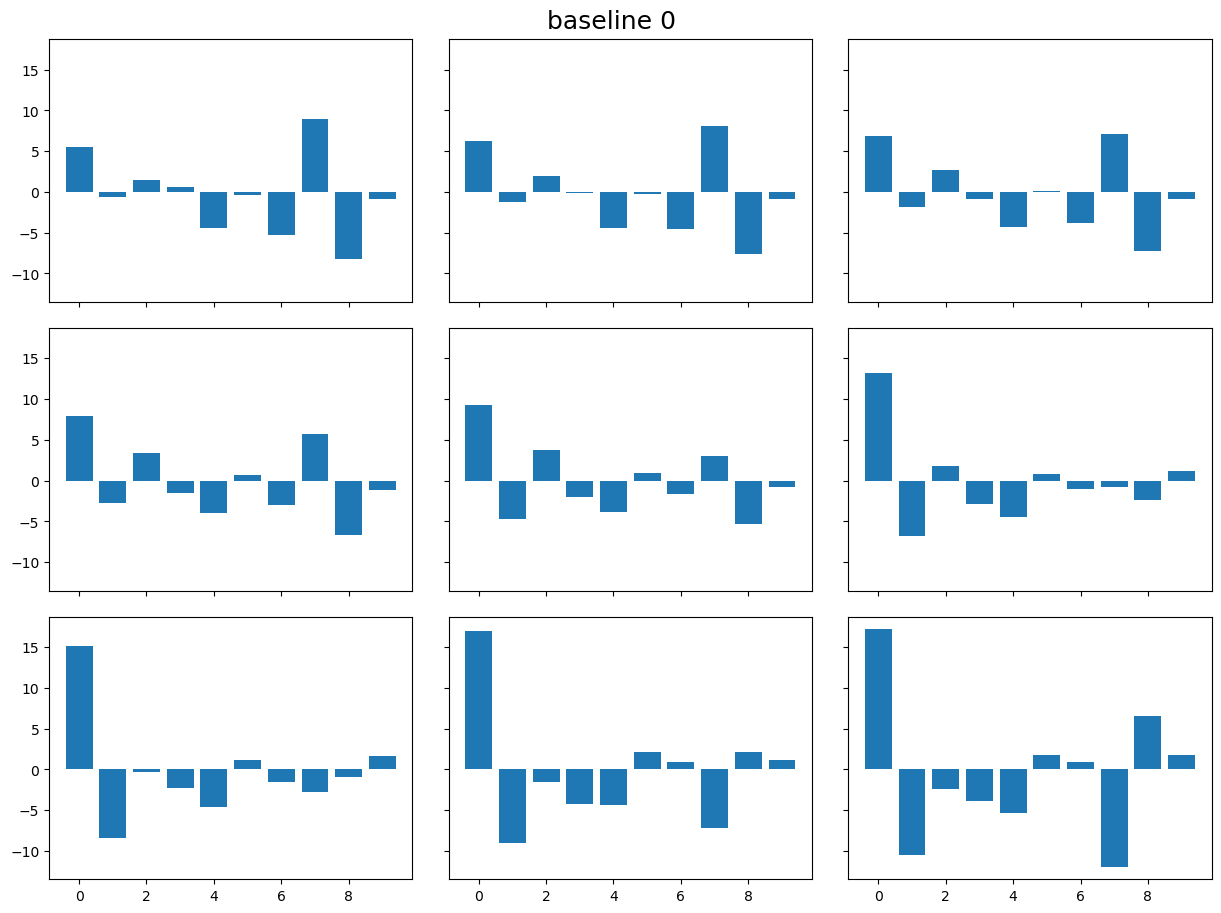

In [26]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize = (15, 10), sharex=True, sharey=True, gridspec_kw={'wspace':0.1, 'hspace':0.1})
plt.suptitle(f'baseline 0', fontsize=18)
plt.subplots_adjust(top=0.95)
for i in range(9):
    axs[i//3,i%3].bar(torch.arange(10), baseline_logits[0,i,0])
    
# plt.savefig('PGD_bl_logits.pdf', bbox_inches="tight")
plt.show()

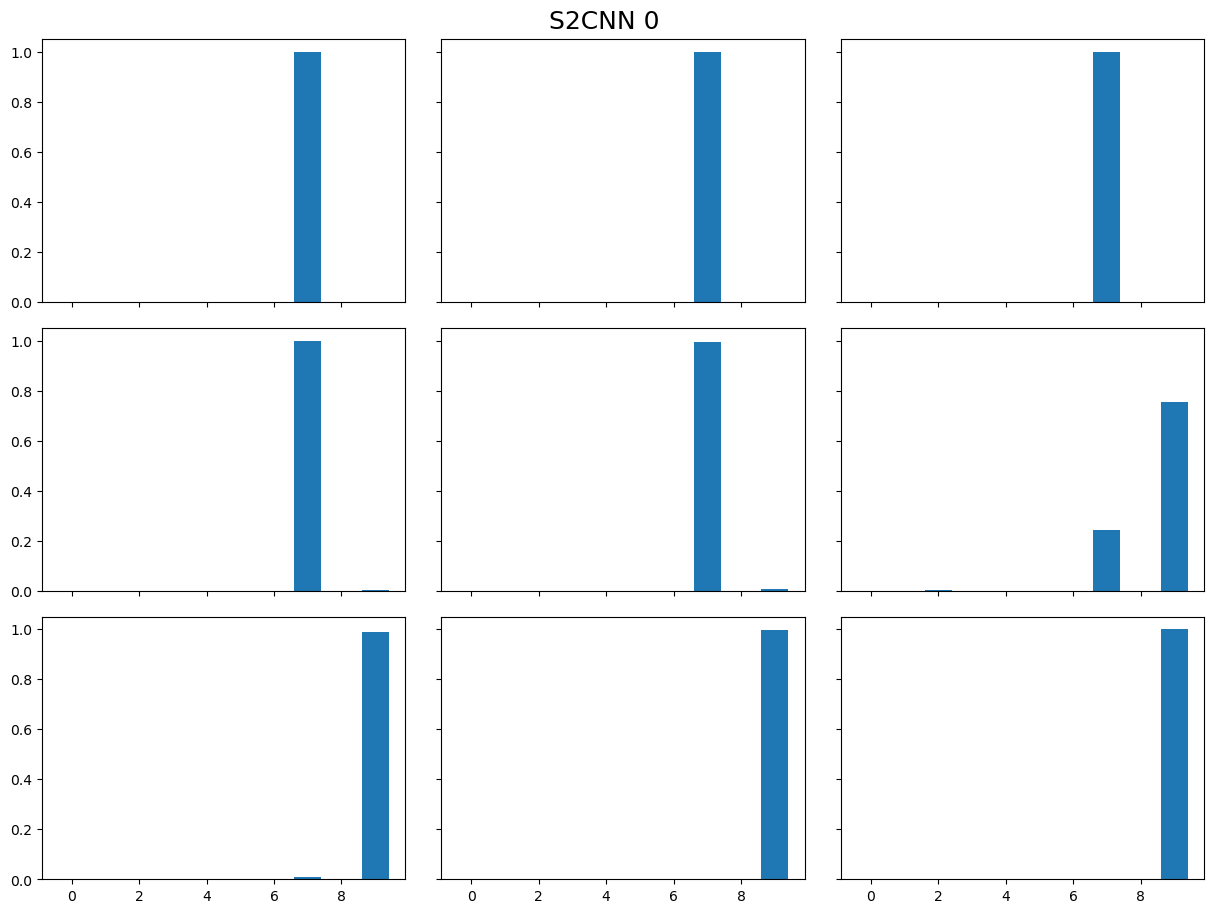

In [27]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize = (15, 10), sharex=True, sharey=True, gridspec_kw={'wspace':0.1, 'hspace':0.1})
plt.suptitle(f'S2CNN 0', fontsize=18)
plt.subplots_adjust(top=0.95)
for i in range(9):
    axs[i//3,i%3].bar(torch.arange(10), S2CNN_probs[0,i,0])
    
# plt.savefig('PGD_S2CNN_probs.pdf', bbox_inches="tight")
plt.show()

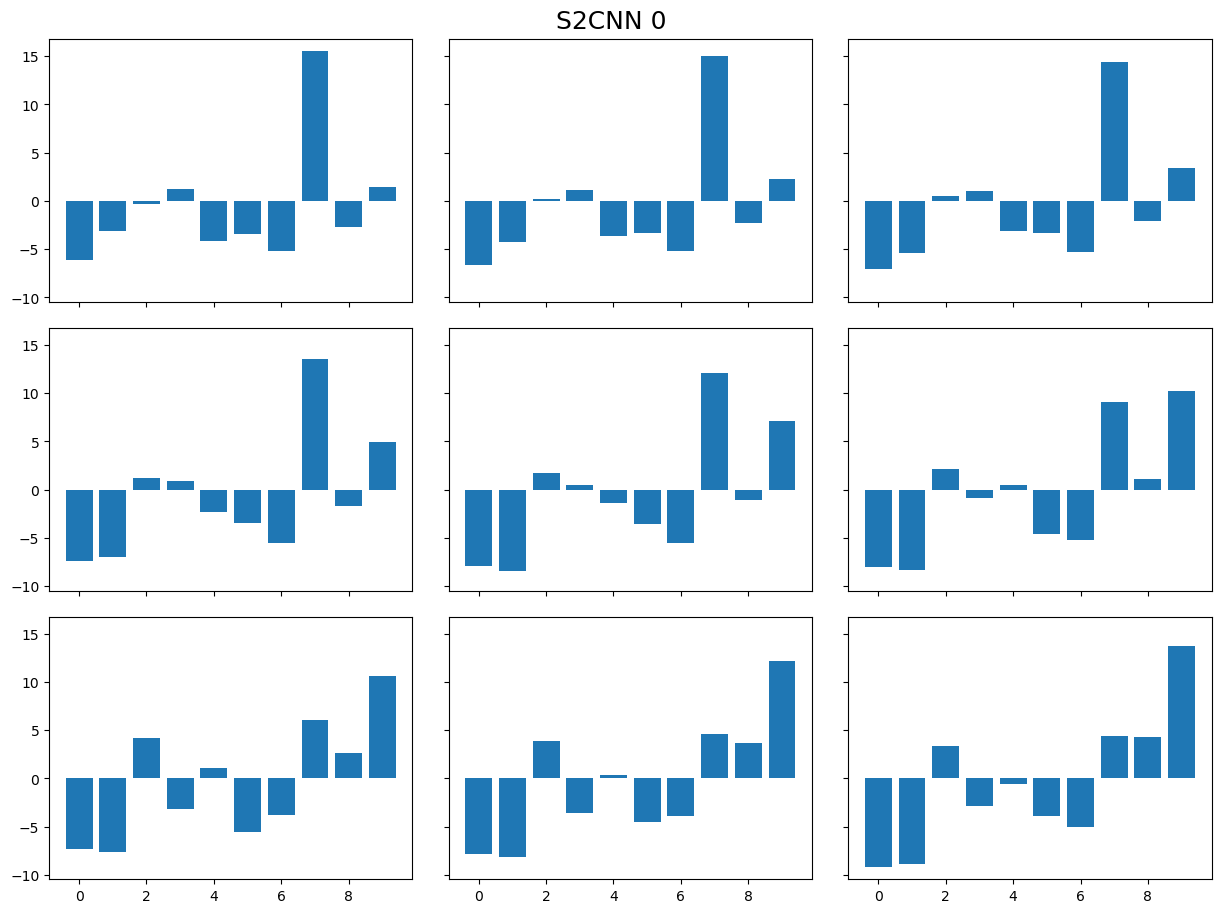

In [52]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize = (15, 10), sharex=True, sharey=True, gridspec_kw={'wspace':0.1, 'hspace':0.1})
plt.suptitle(f'S2CNN 0', fontsize=18)
plt.subplots_adjust(top=0.95)
for i in range(9):
    axs[i//3,i%3].bar(torch.arange(10), S2CNN_logits[0,i,0])
    
# plt.savefig('PGD_S2CNN_logits.pdf', bbox_inches="tight")
plt.show()

In [29]:
def show_prob_plot(probs, n, m, model_type='baseline'):
    fig, axs = plt.subplots(nrows=3, ncols=3, figsize = (15, 15), sharex=True, sharey=True, gridspec_kw={'wspace':0.1, 'hspace':0.1})
    plt.suptitle(f'{model_type} {n}', fontsize=18)
    plt.subplots_adjust(top=0.95)
    for i in range(9):
        axs[i//3,i%3].bar(torch.arange(10), baseline_probs[n,i,m])
        
    plt.show()

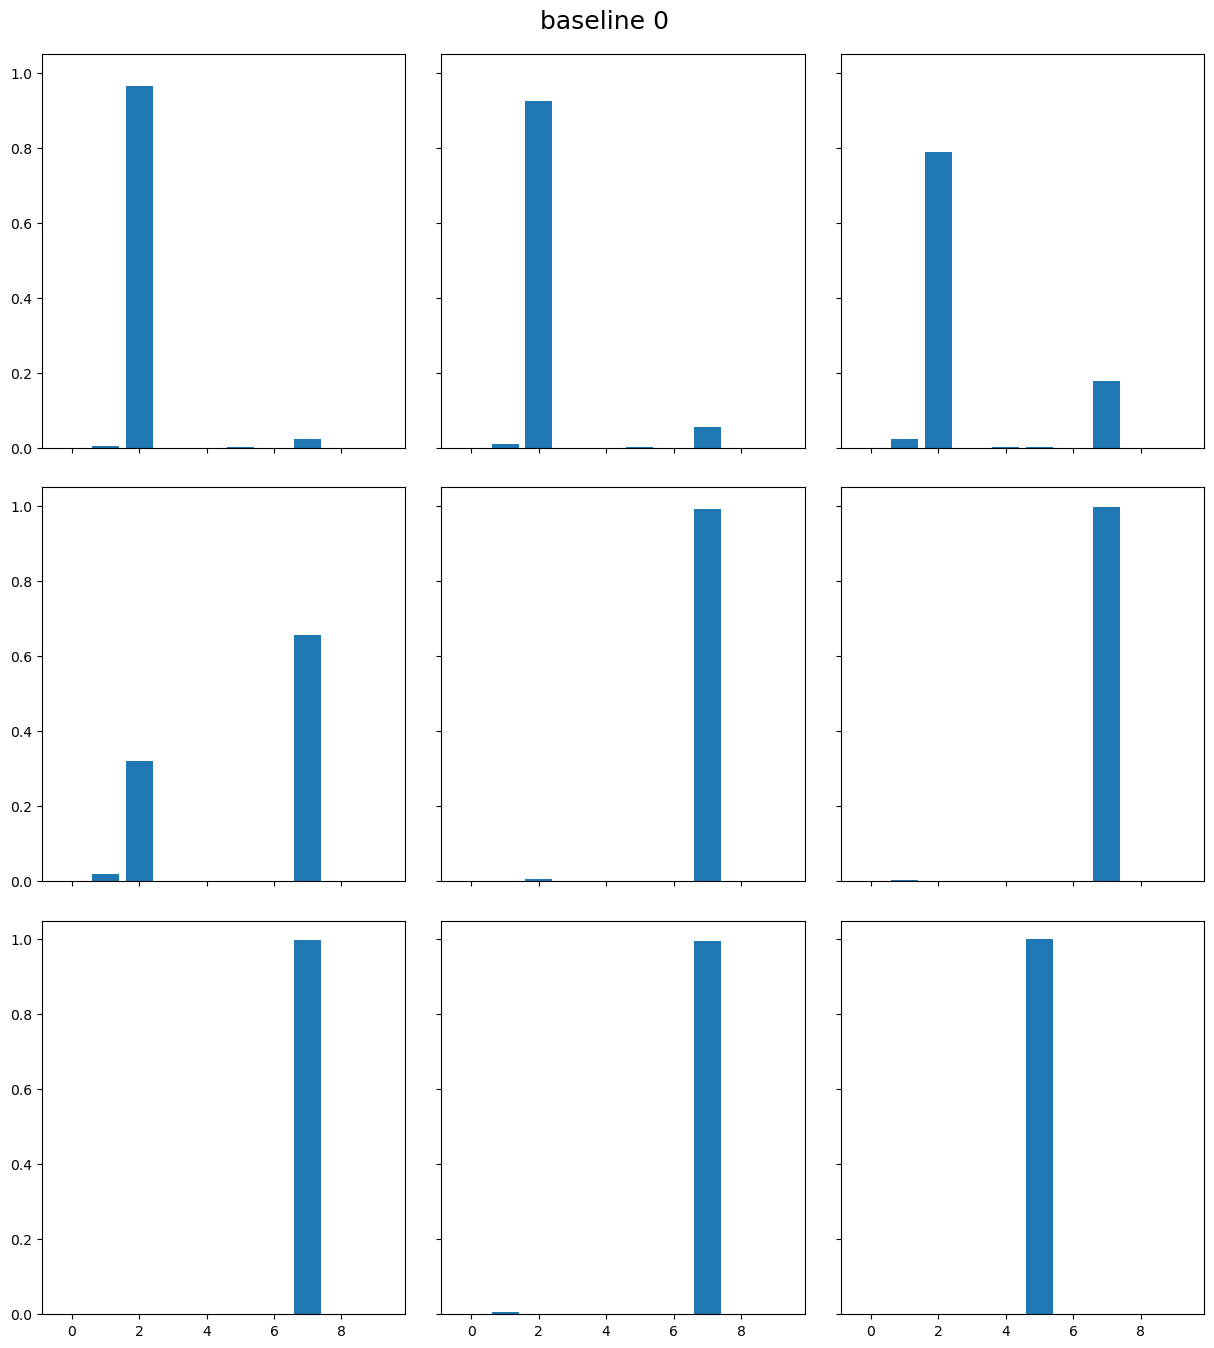

In [30]:
show_prob_plot(baseline_probs, 0, 1)

In [31]:
def kl_div_all(probs):
    kl_loss = torch.nn.KLDivLoss(reduction='none')
    kl_losses = torch.stack([kl_loss(torch.log(probs[:,i]), probs[:,0]) for i in range(probs.size(1))])
    return torch.sum(kl_losses, dim=-1).permute(1,0,2)

In [32]:
def kl_div(probs, n):
    kl_loss = torch.nn.KLDivLoss(reduction='none')
    kl_losses = torch.stack([kl_loss(torch.log(probs[n,i]), probs[n,0]) for i in range(probs[n].size(0))])
    return torch.sum(kl_losses, dim=-1)

In [33]:
kl_divs_2 = kl_div_all(baseline_probs)

In [34]:
kl_divs = kl_div(baseline_probs, 0)

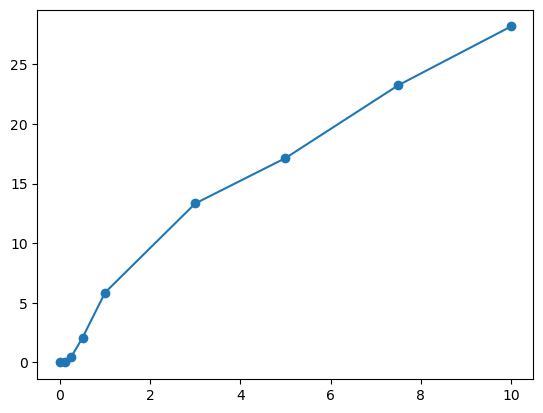

In [35]:
plt.plot(baseline_params['epsilons'], kl_divs[:,0], 'o-')
plt.show()

In [36]:
std, mean = torch.std_mean(kl_divs, dim=1)

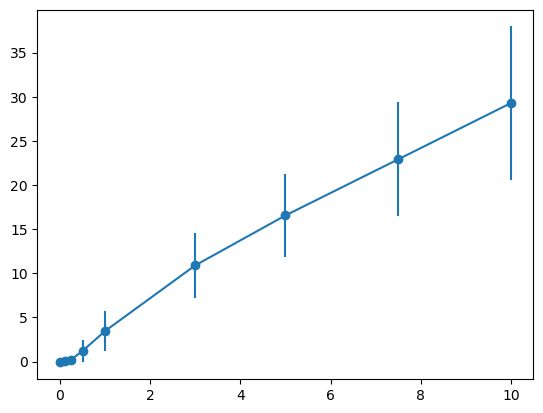

In [37]:
plt.errorbar(baseline_params['epsilons'], mean, yerr=std, linestyle='-', marker='o')
plt.show()

In [38]:
# ignore infinities during the calculation of mean and std
def std_mean(tensor, dim):
    if torch.all(torch.isfinite(tensor)):
        std, mean = torch.std_mean(tensor, dim)
    else:
        mean = torch.as_tensor(np.mean(np.ma.masked_invalid(tensor), axis=dim), dtype=torch.float32)
        std = torch.as_tensor(np.std(np.ma.masked_invalid(tensor), axis=dim), dtype=torch.float32)
    return std, mean

In [39]:
kl_div_bl10 = kl_div(baseline_probs, 10)
kl_div_S20 = kl_div(S2CNN_probs, 0)

In [40]:
std_bl10, mean_bl10 = std_mean(kl_div_bl10, dim=1)
std_S20, mean_S20 = std_mean(kl_div_S20, dim=1)

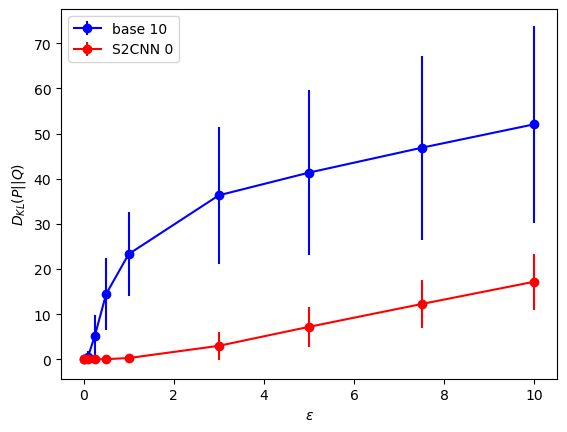

In [41]:
plt.errorbar(baseline_params['epsilons'], mean_bl10, yerr=std_bl10, linestyle='-', marker='o', color='b', label='base 10')
plt.errorbar(S2CNN_params['epsilons'], mean_S20, yerr=std_S20, linestyle='-', marker='o', color='r', label='S2CNN 0')
plt.xlabel('$\epsilon$')
plt.ylabel('$D_{KL}(P||Q)$')
plt.legend(loc='upper left')
# plt.savefig('KL_div.pdf', bbox_inches="tight")
plt.show()

In [42]:
def show_nine_images(images, params, preds, n, m, title='baseline', vmin=0, vmax=255):
    fig, axs = plt.subplots(nrows=3, ncols=3, figsize = (15, 15), sharex=True, sharey=True, gridspec_kw={'wspace':0.1, 'hspace':0.1})
    plt.suptitle(f'{title} {n}', fontsize=18)
    plt.subplots_adjust(top=0.95)
    for i in range(3):
        axs[0,i].imshow(images[n][i,m,0], cmap='gray', vmin=vmin, vmax=vmax)
        axs[0,i].set_title(f"$\epsilon$ = {params['epsilons'][i]}")
        axs[0,i].set_ylabel(f"pred: {preds[n][i,m].item()}")
        axs[0,i].set_xticks([])
        axs[0,i].set_yticks([])

    for i in range(3,6):
        axs[1,i-3].imshow(images[n][i,m,0], cmap='gray', vmin=vmin, vmax=vmax)
        axs[1,i-3].set_title(f"$\epsilon$ = {params['epsilons'][i]}")
        axs[1,i-3].set_ylabel(f"pred: {preds[n][i,m]}")

    for i in range(6,9):
        axs[2,i-6].imshow(images[n][i,m,0], cmap='gray', vmin=vmin, vmax=vmax)
        axs[2,i-6].set_title(f"$\epsilon$ = {params['epsilons'][i]}")
        axs[2,i-6].set_ylabel(f"pred: {preds[n][i,m]}")
    plt.show()

In [43]:
def show_differences(images, params, preds, n, m, title='baseline', vmin=-10, vmax=10):
    fig, axs = plt.subplots(nrows=3, ncols=3, figsize = (15, 15), sharex=True, sharey=True, gridspec_kw={'wspace':0.1, 'hspace':0.1})
    plt.suptitle(f'{title} {n}', fontsize=18)
    plt.subplots_adjust(top=0.95)
    for i in range(3):
        axs[0,i].imshow(images[n][i,m,0]-images[n][0,m,0], cmap='gray', vmin=vmin, vmax=vmax)
        axs[0,i].set_title(f"$\epsilon$ = {params['epsilons'][i]}")
        axs[0,i].set_ylabel(f"pred: {preds[n][i,m]}")
        axs[0,i].set_xticks([])
        axs[0,i].set_yticks([])

    for i in range(3,6):
        axs[1,i-3].imshow(images[n][i,m,0]-images[n][0,m,0], cmap='gray', vmin=vmin, vmax=vmax)
        axs[1,i-3].set_title(f"$\epsilon$ = {params['epsilons'][i]}")
        axs[1,i-3].set_ylabel(f"pred: {preds[n][i,m]}")

    for i in range(6,9):
        axs[2,i-6].imshow(images[n][i,m,0]-images[n][0,m,0], cmap='gray', vmin=vmin, vmax=vmax)
        axs[2,i-6].set_title(f"$\epsilon$ = {params['epsilons'][i]}")
        axs[2,i-6].set_ylabel(f"pred: {preds[n][i,m]}")
    plt.show()

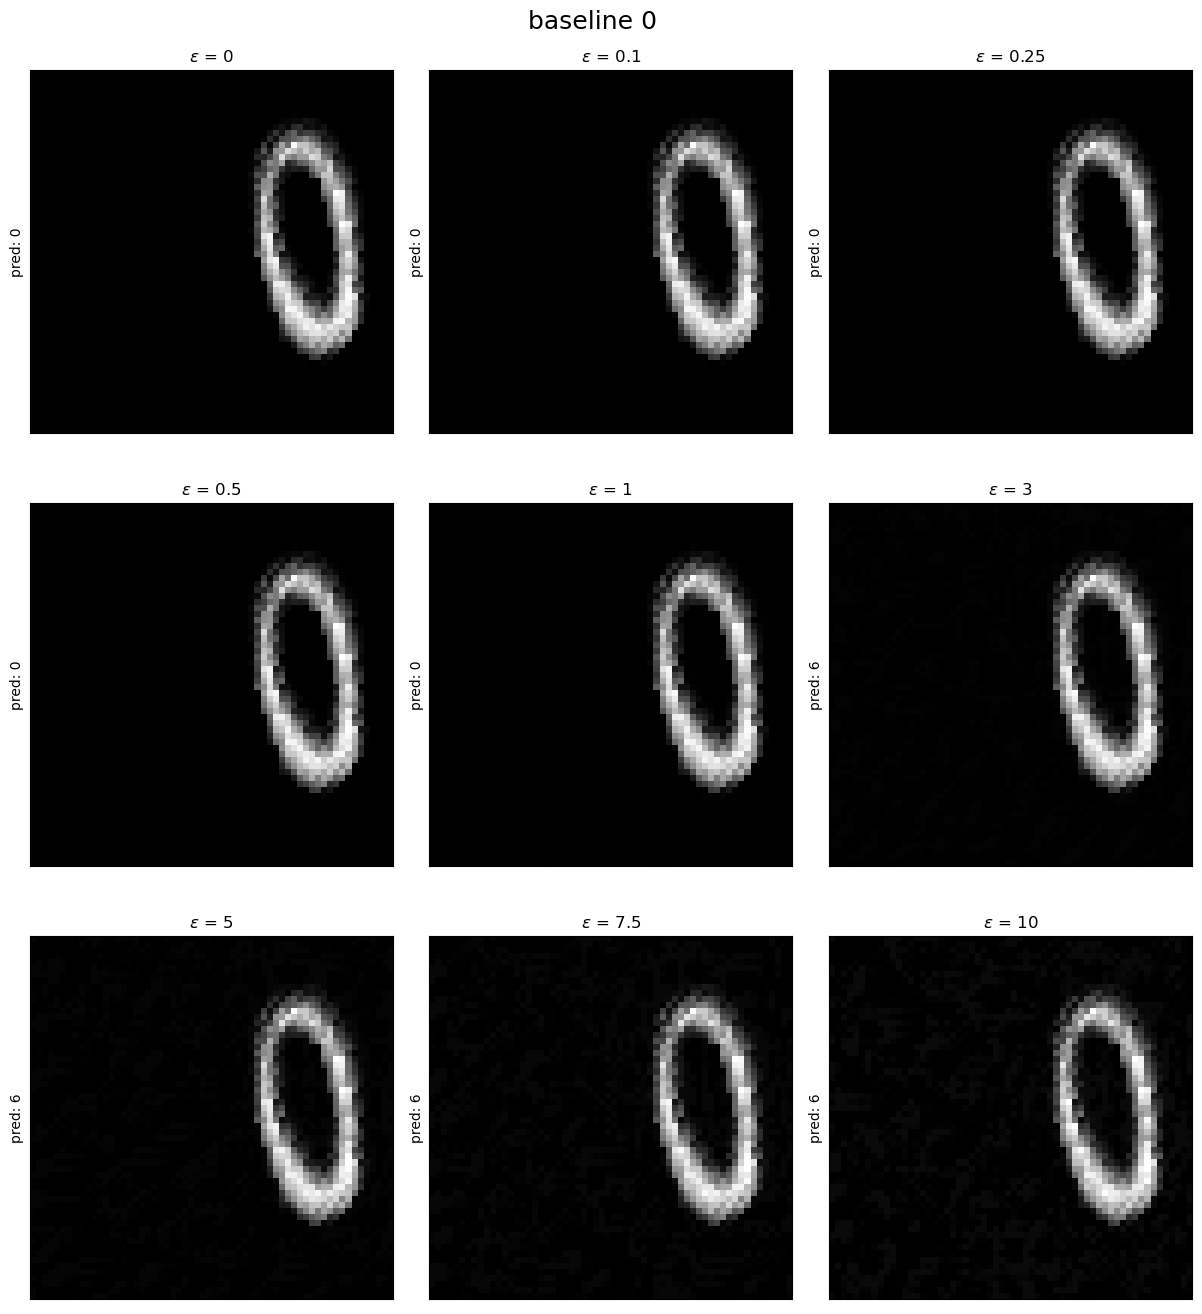

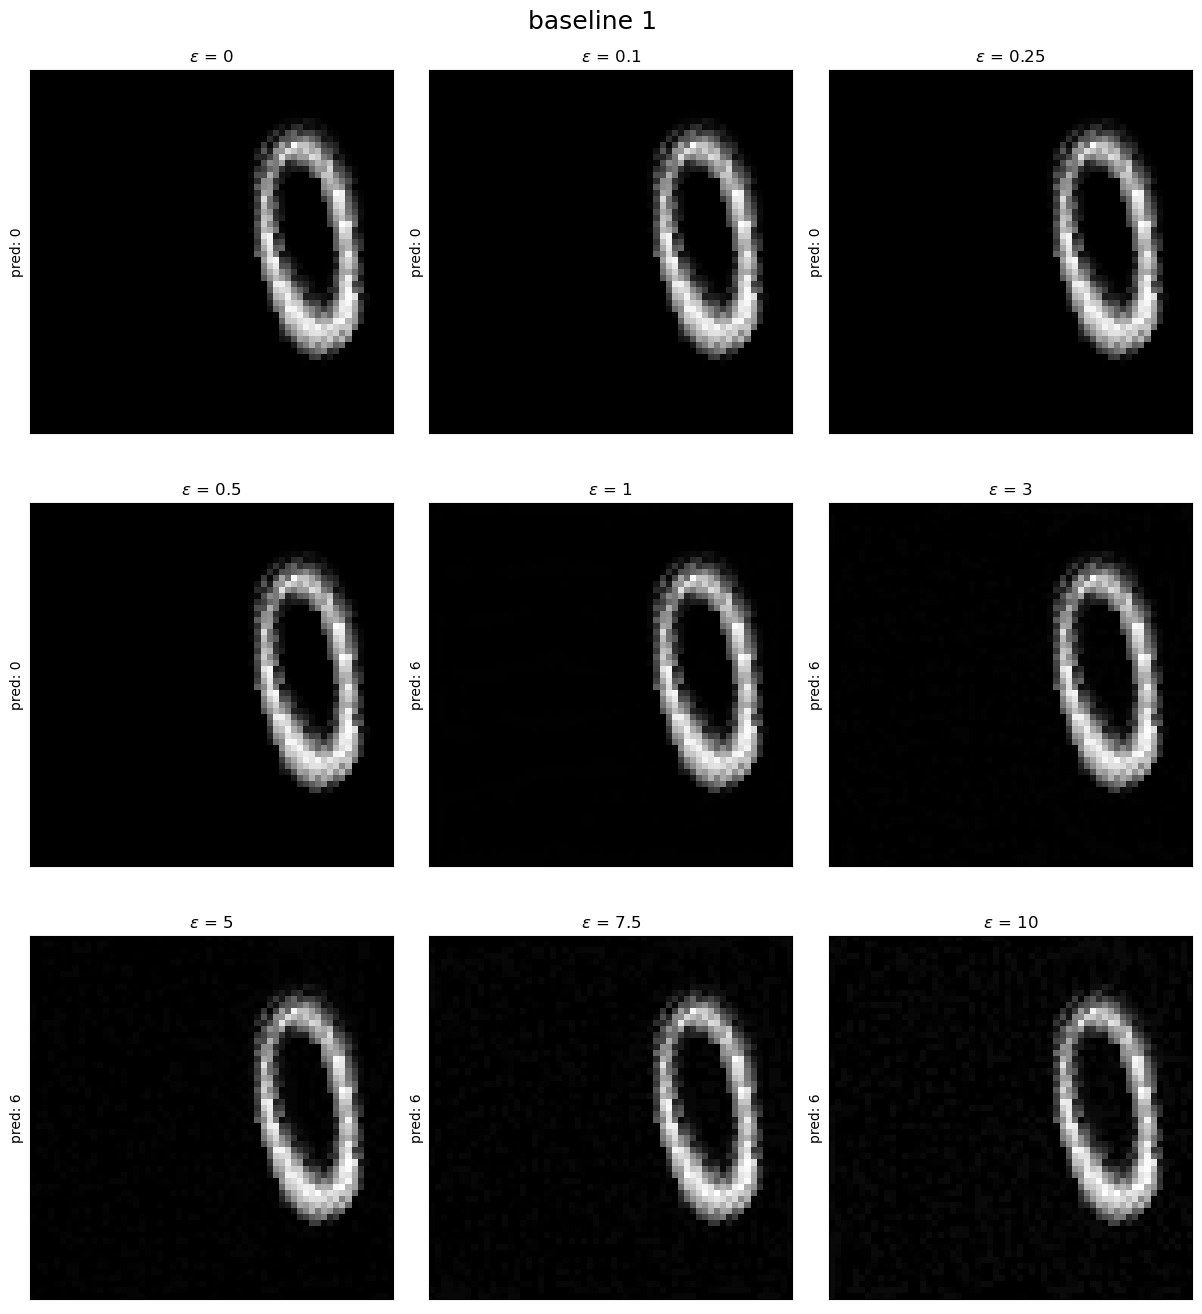

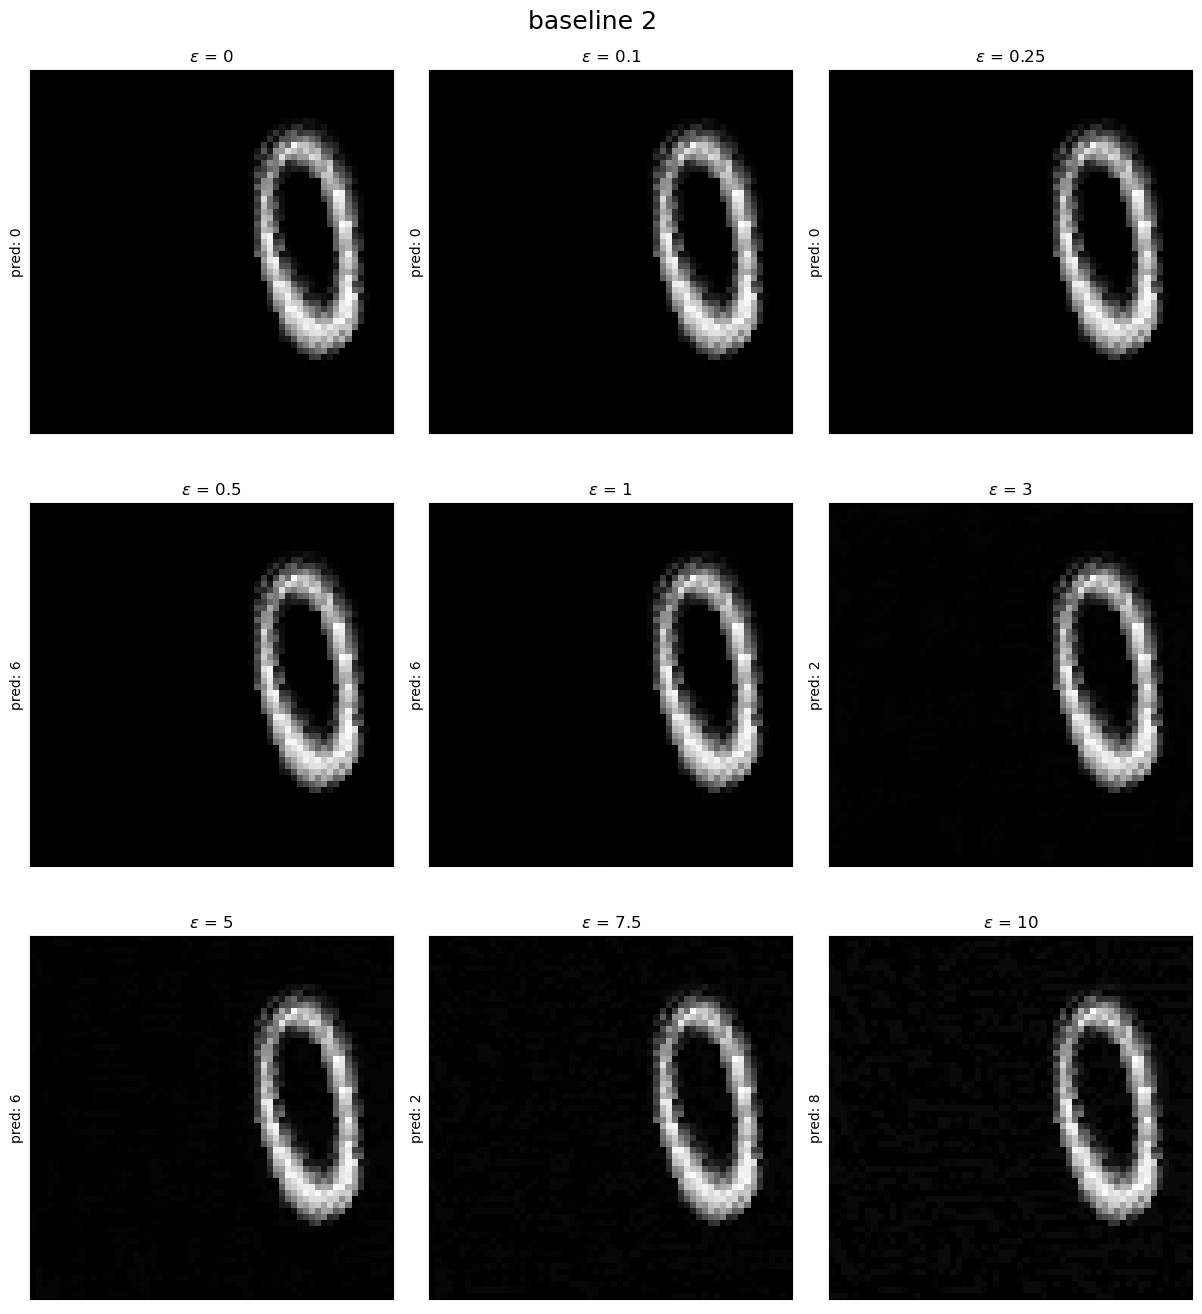

In [44]:
for i in range(3):
    show_nine_images(baseline_images, baseline_params, baseline_preds, i, 2)

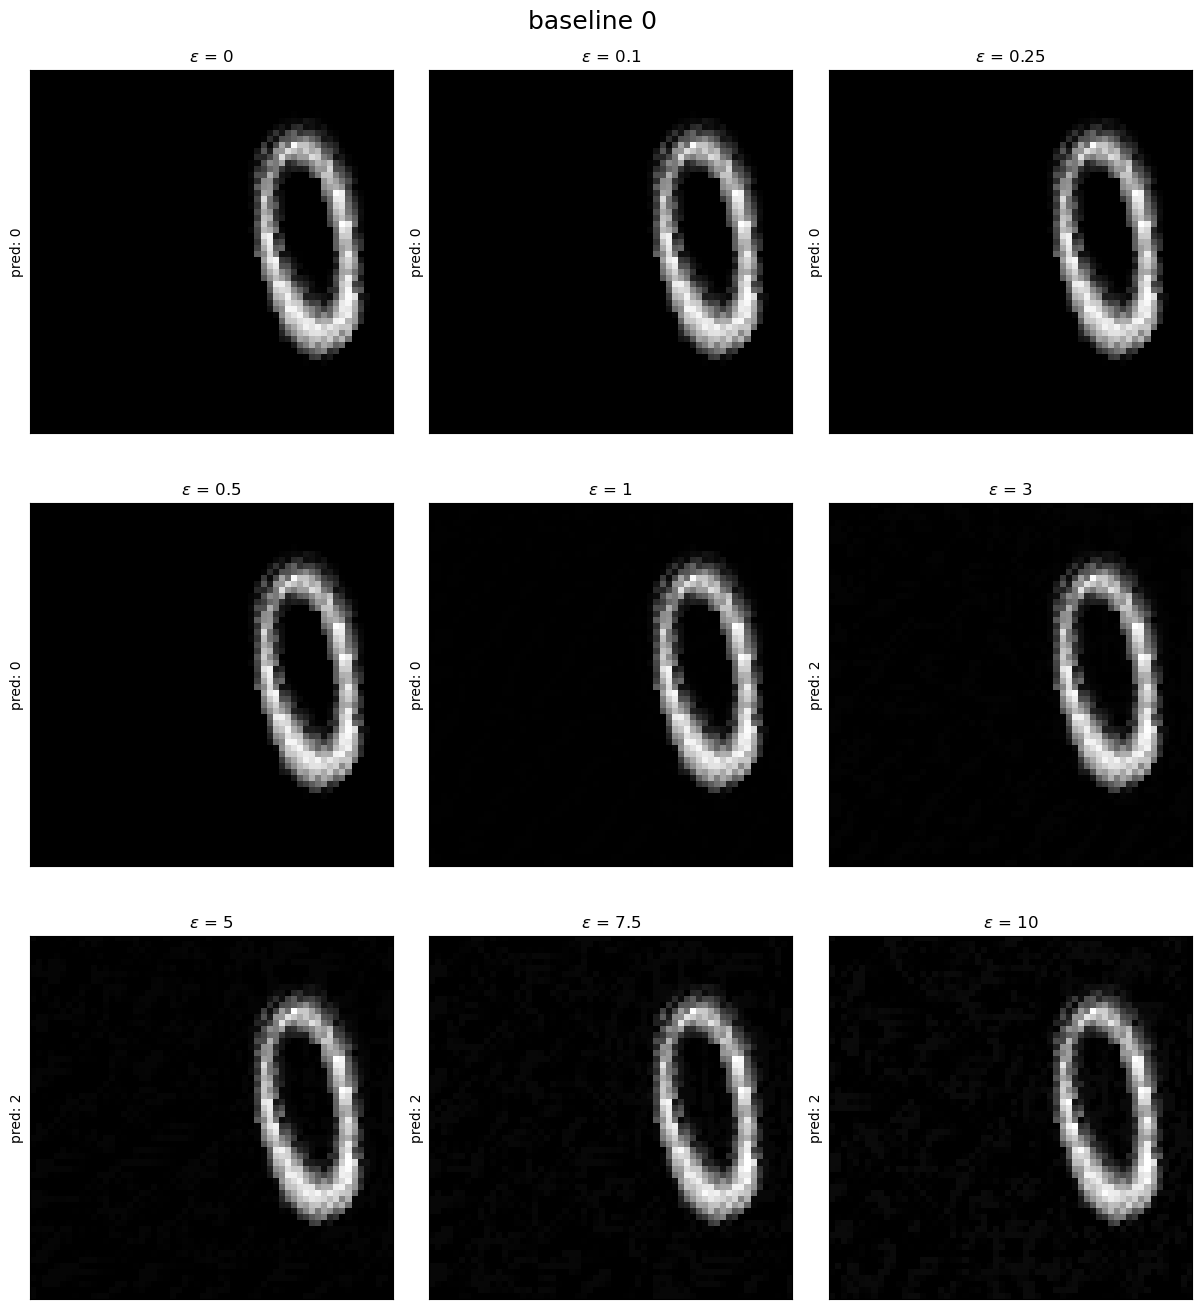

In [45]:
show_nine_images(baseline_images, S2CNN_params, S2CNN_preds, 0, 2)

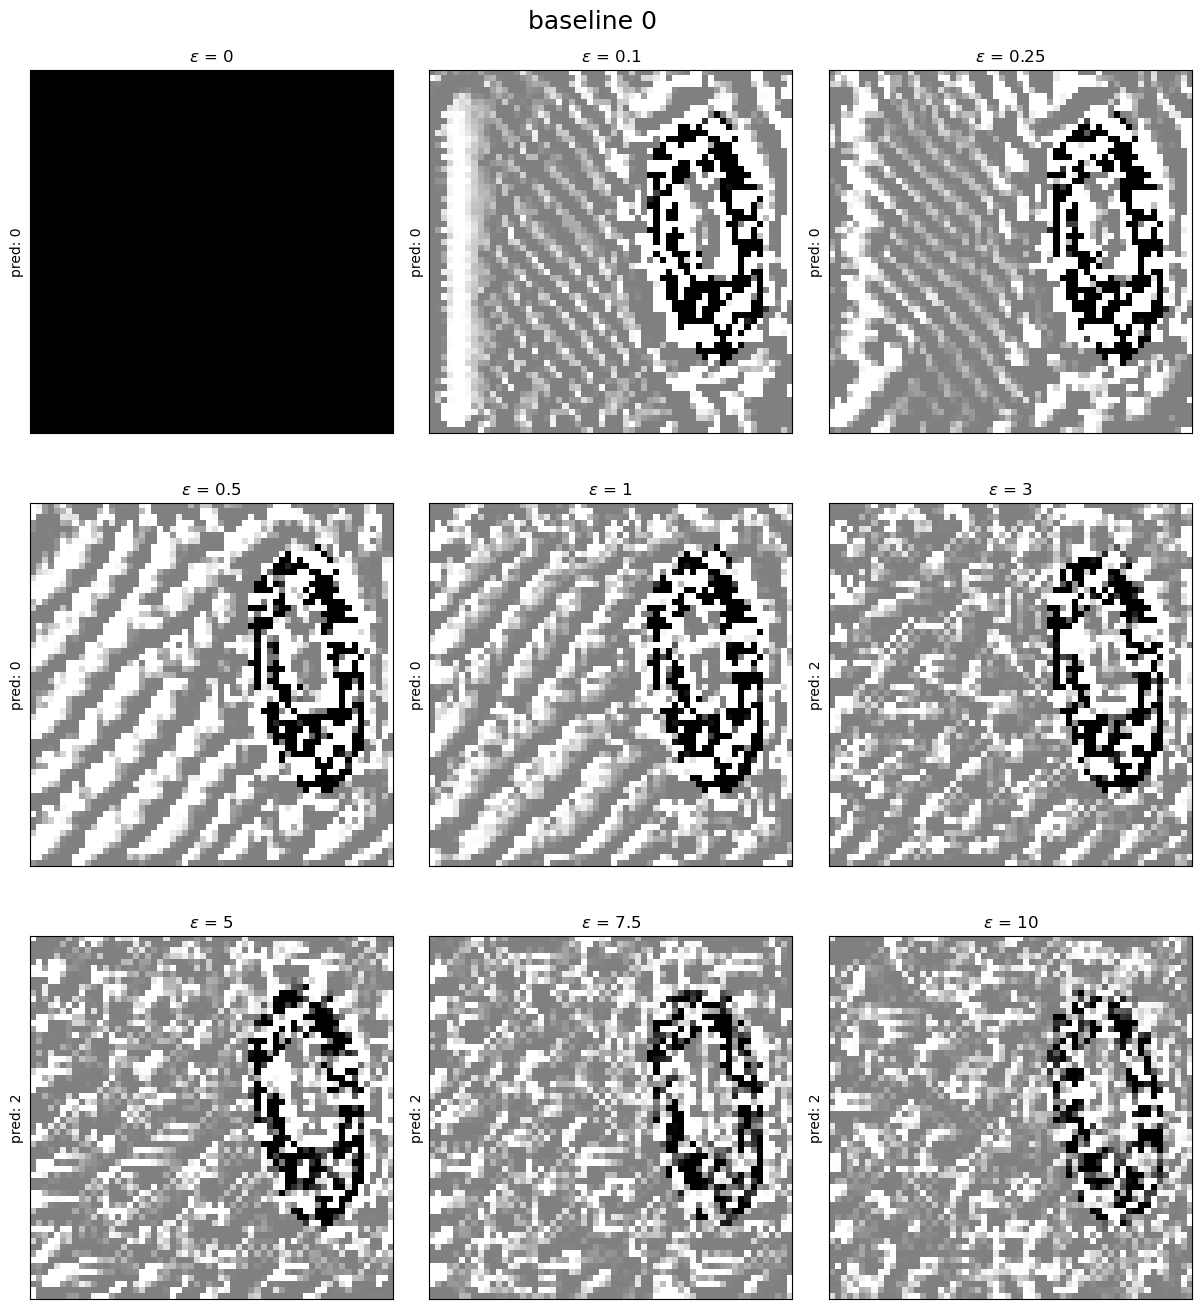

In [46]:
show_differences(baseline_images, S2CNN_params, S2CNN_preds, 0, 2, vmin=None, vmax=None)

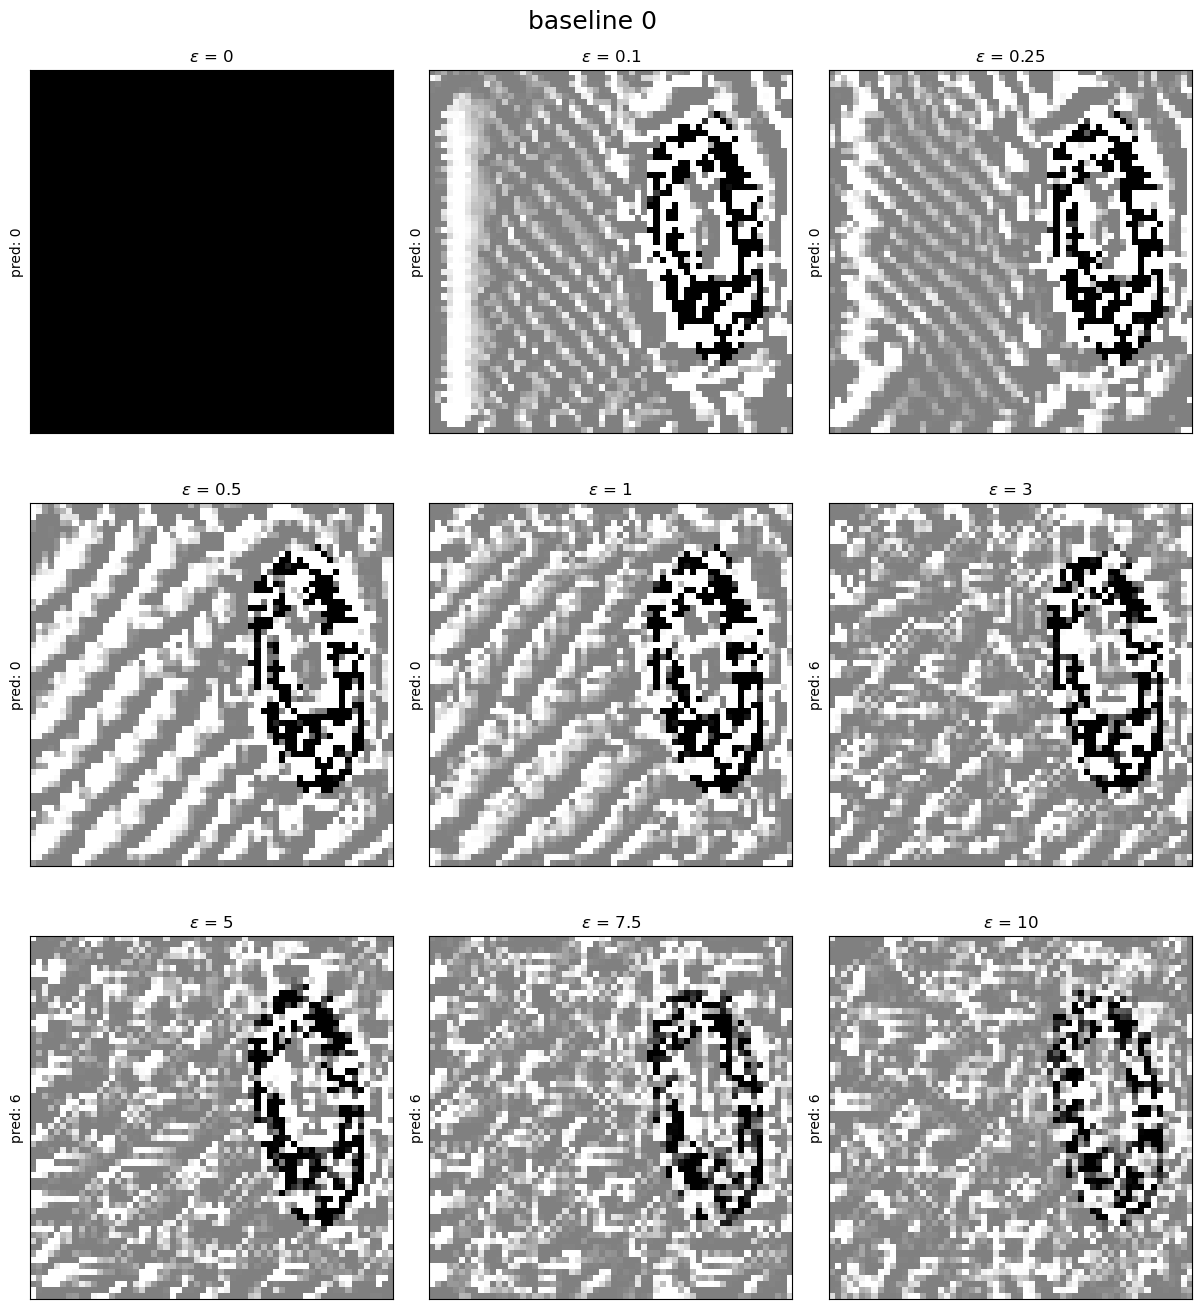

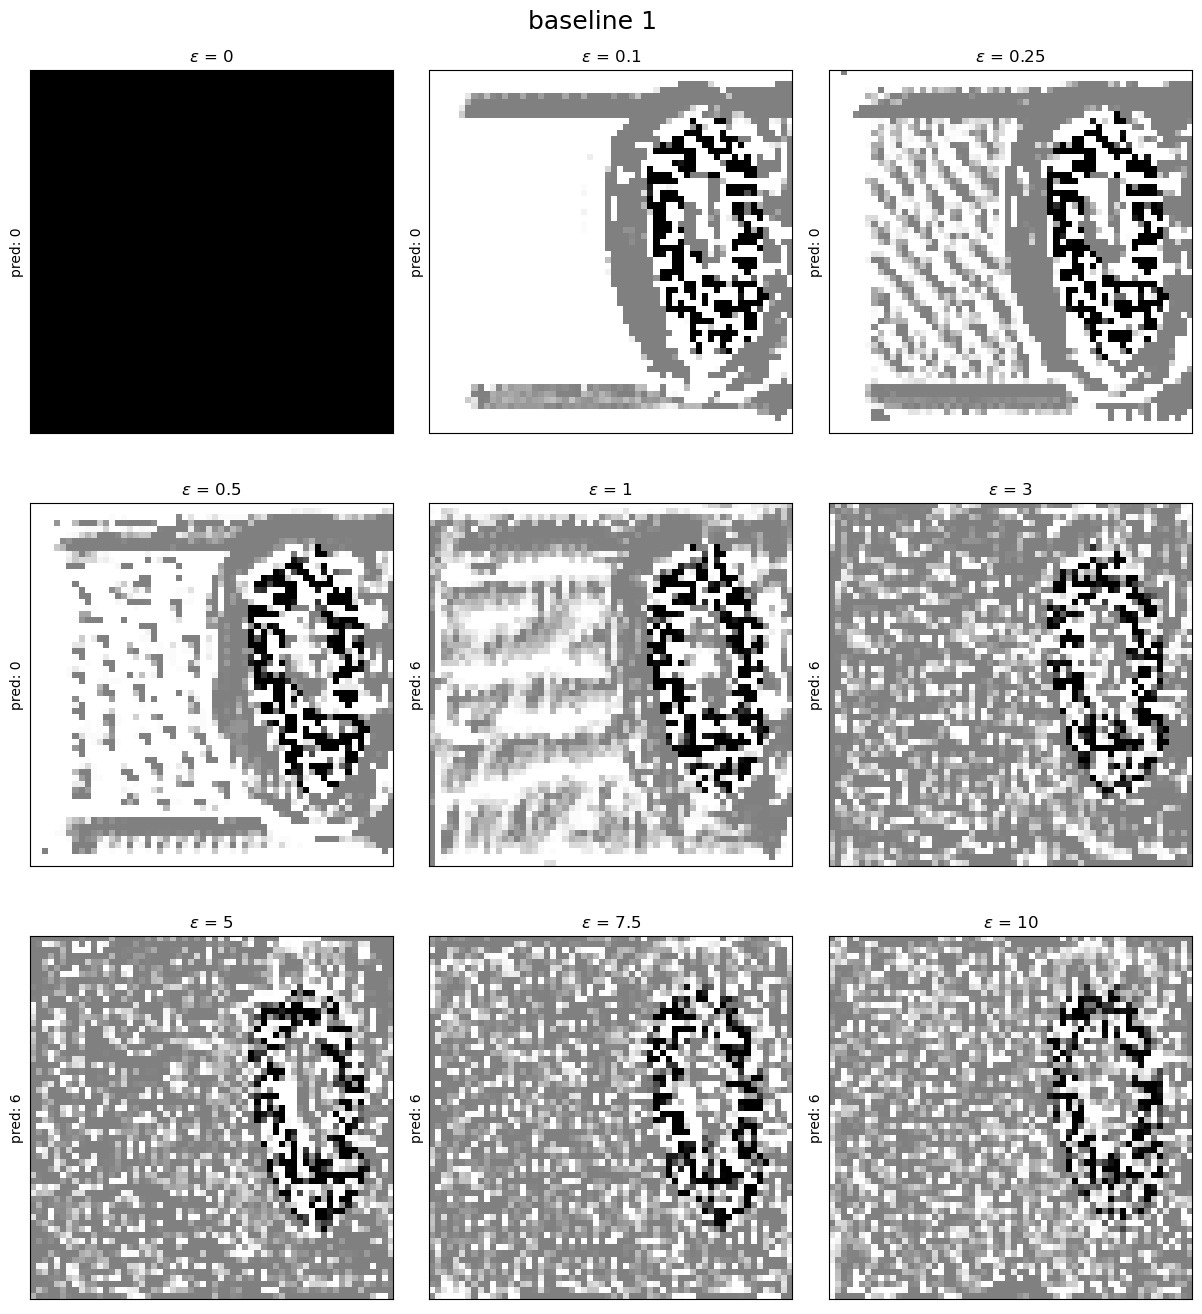

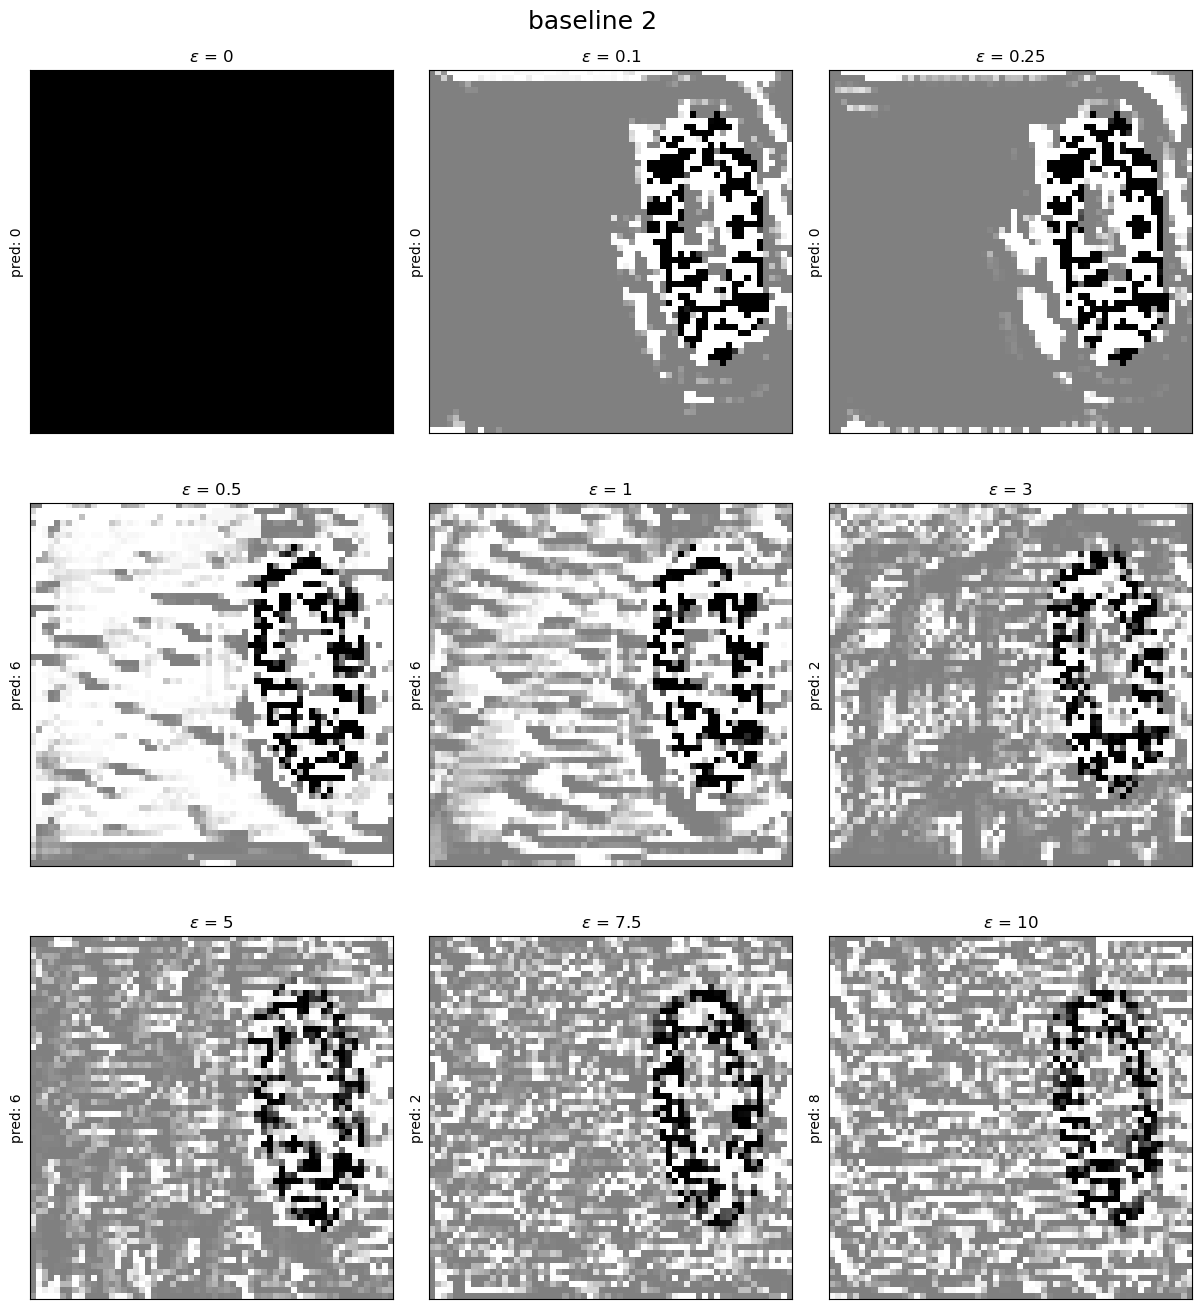

In [47]:
for i in range(3):
    show_differences(baseline_images, baseline_params, baseline_preds, i, 2, vmin=None, vmax=None)

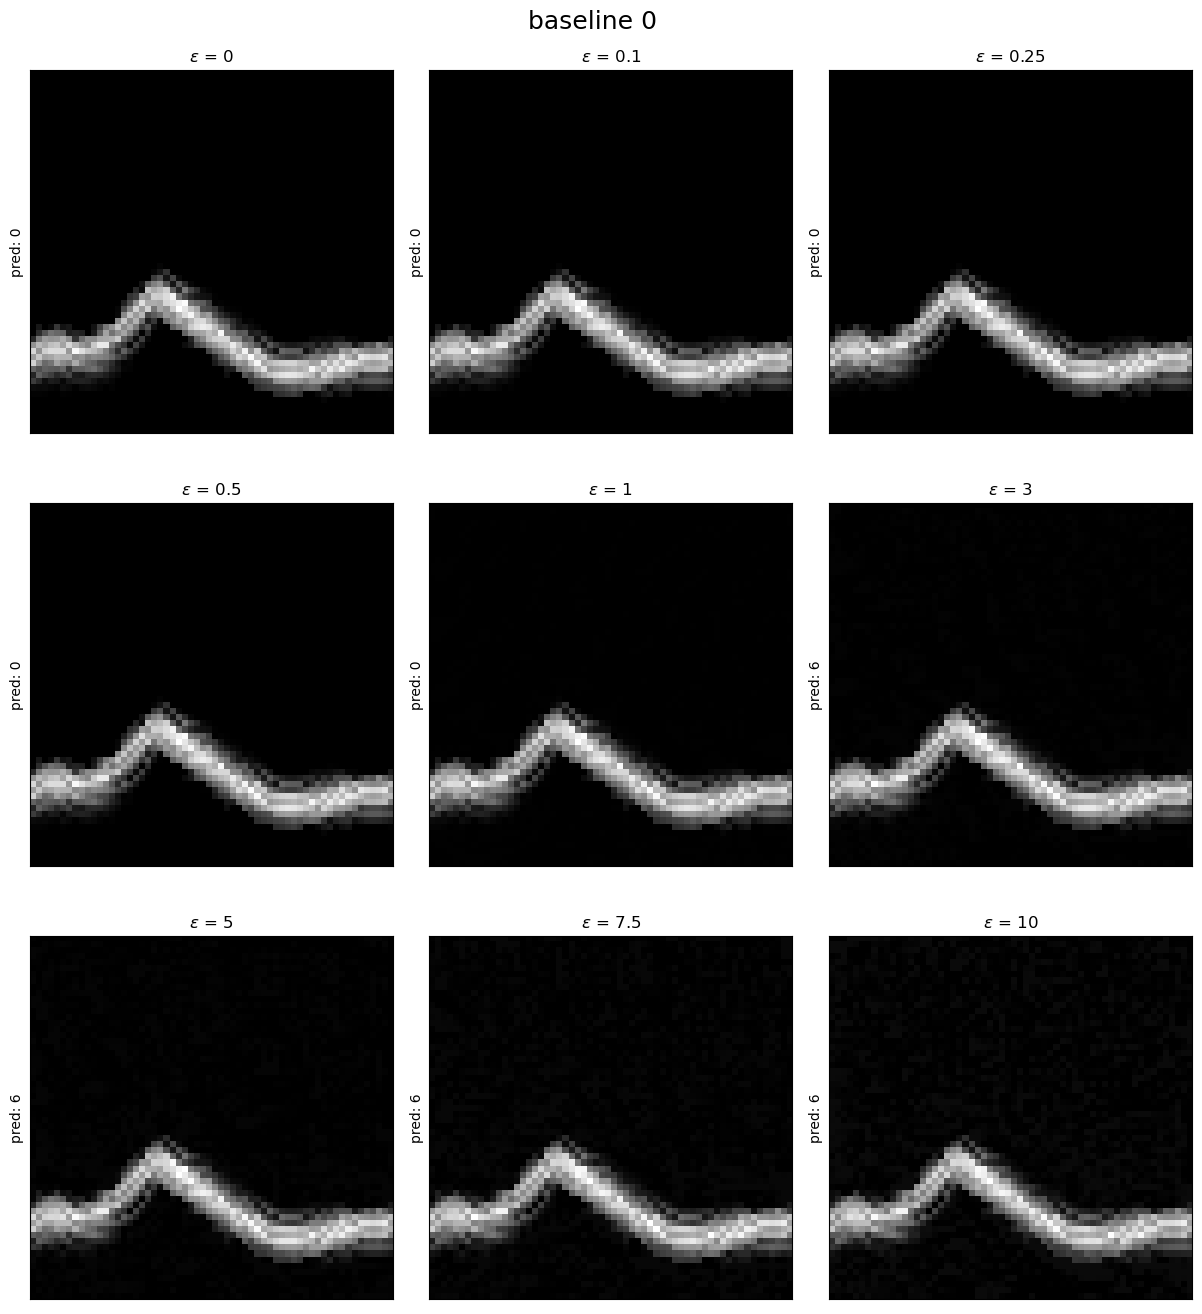

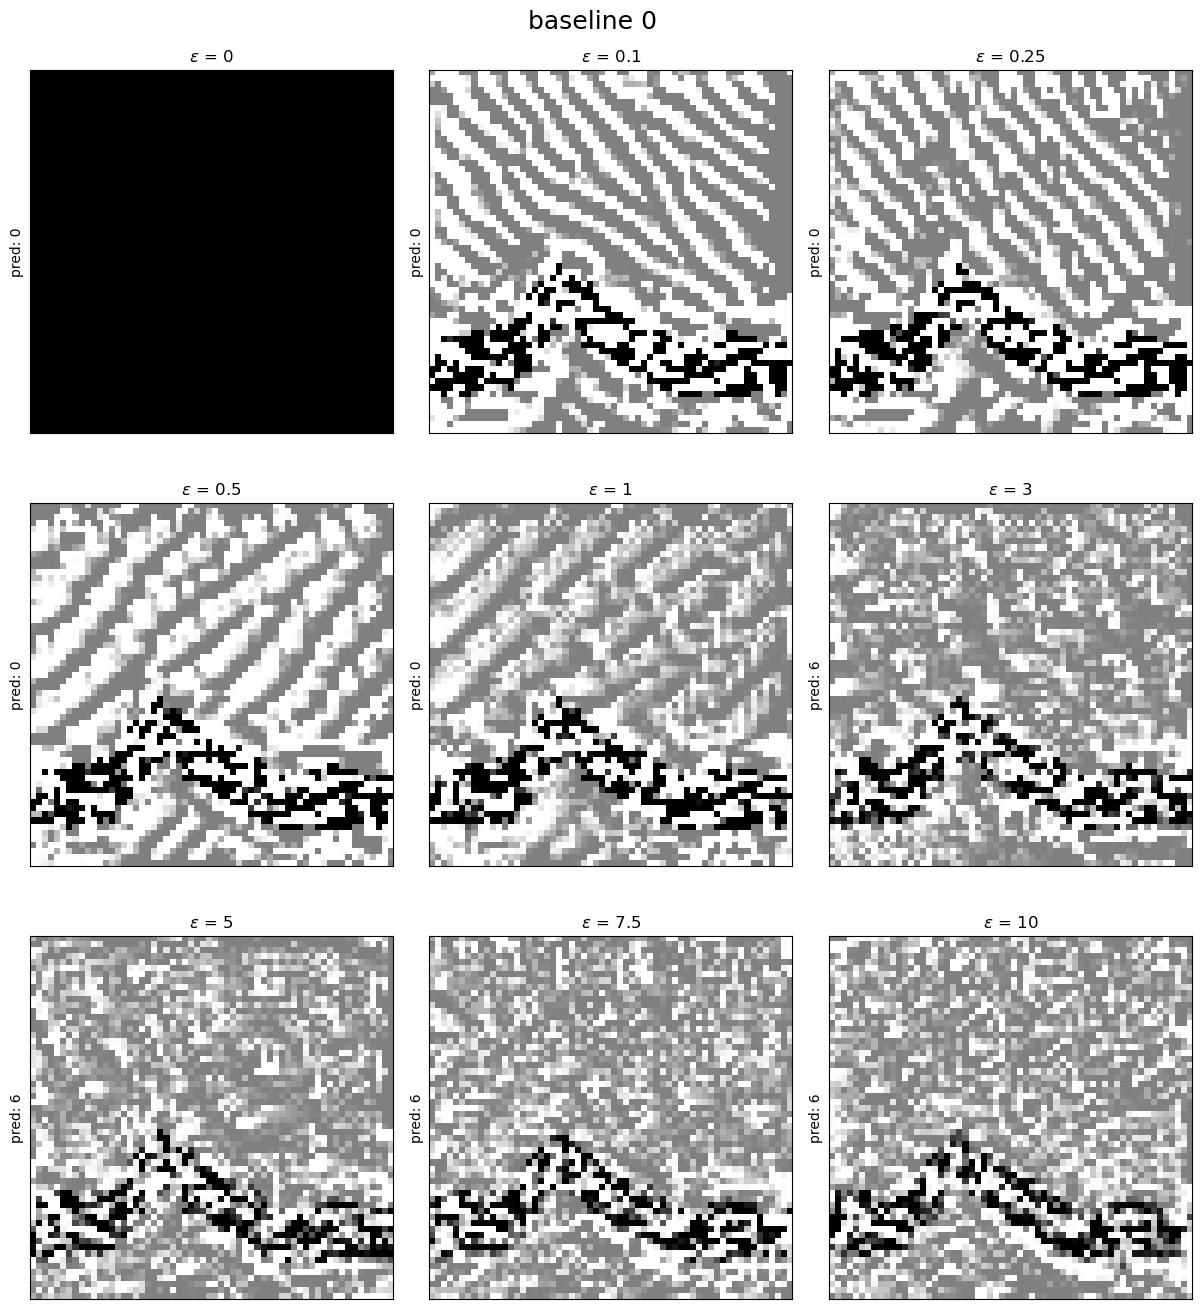

In [48]:
show_nine_images(baseline_images, baseline_params, baseline_preds, 0, 1, vmin=None, vmax=None)
show_differences(baseline_images, baseline_params, baseline_preds, 0, 1, vmin=None, vmax=None)

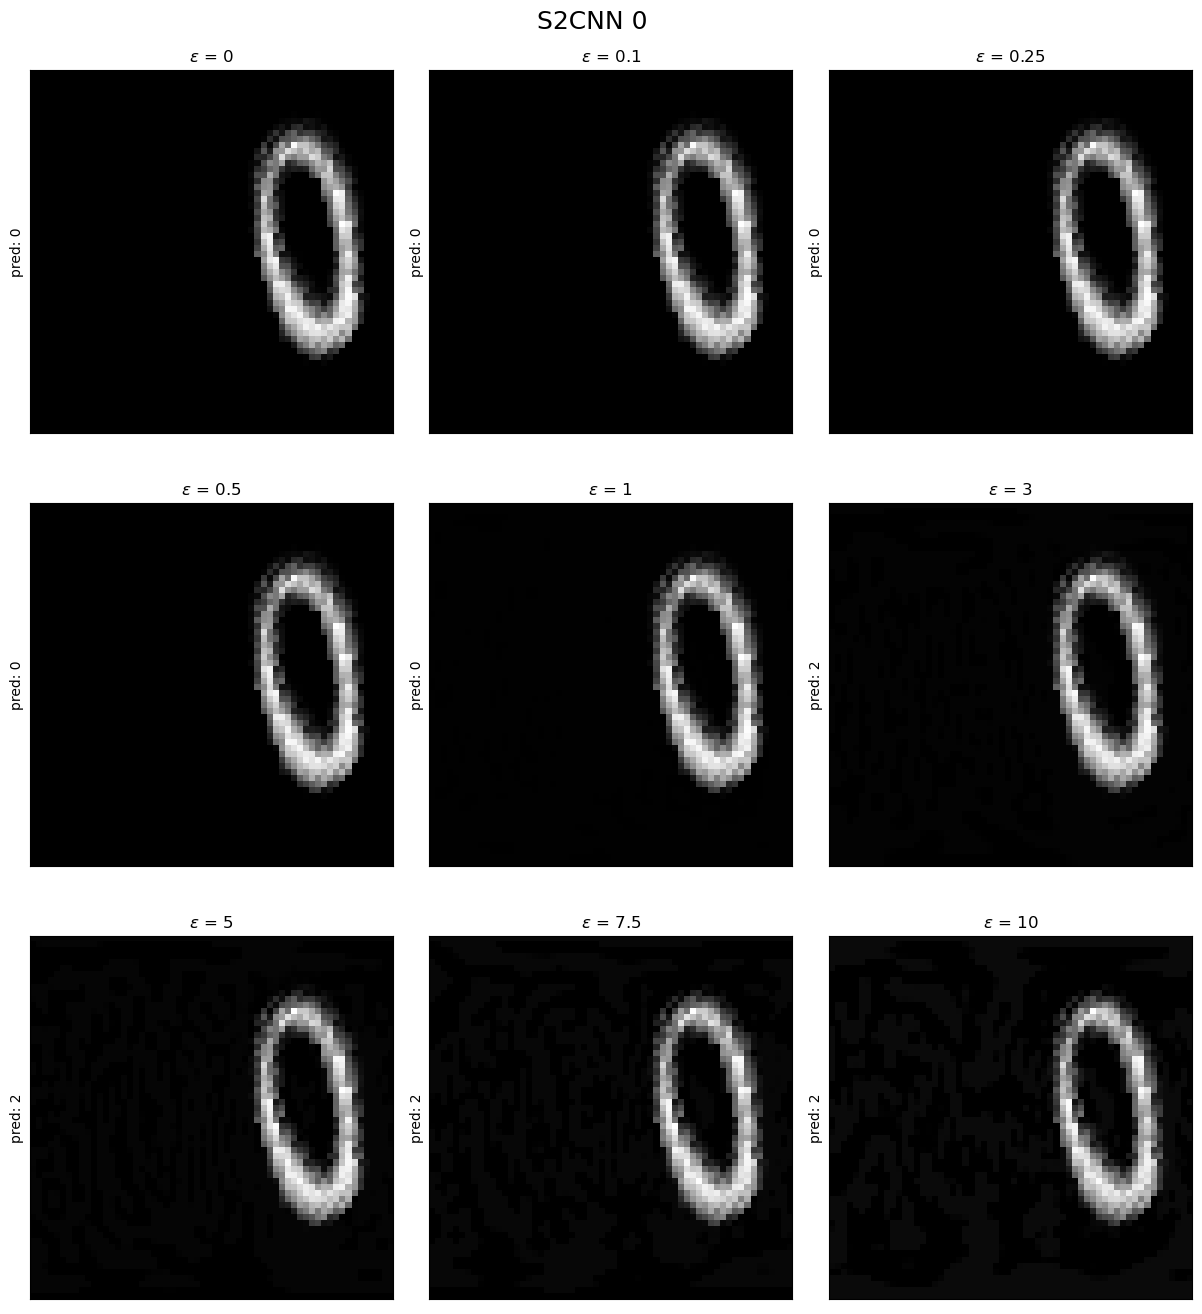

In [49]:
show_nine_images(S2CNN_images, S2CNN_params, S2CNN_preds, 0, 2, title='S2CNN')

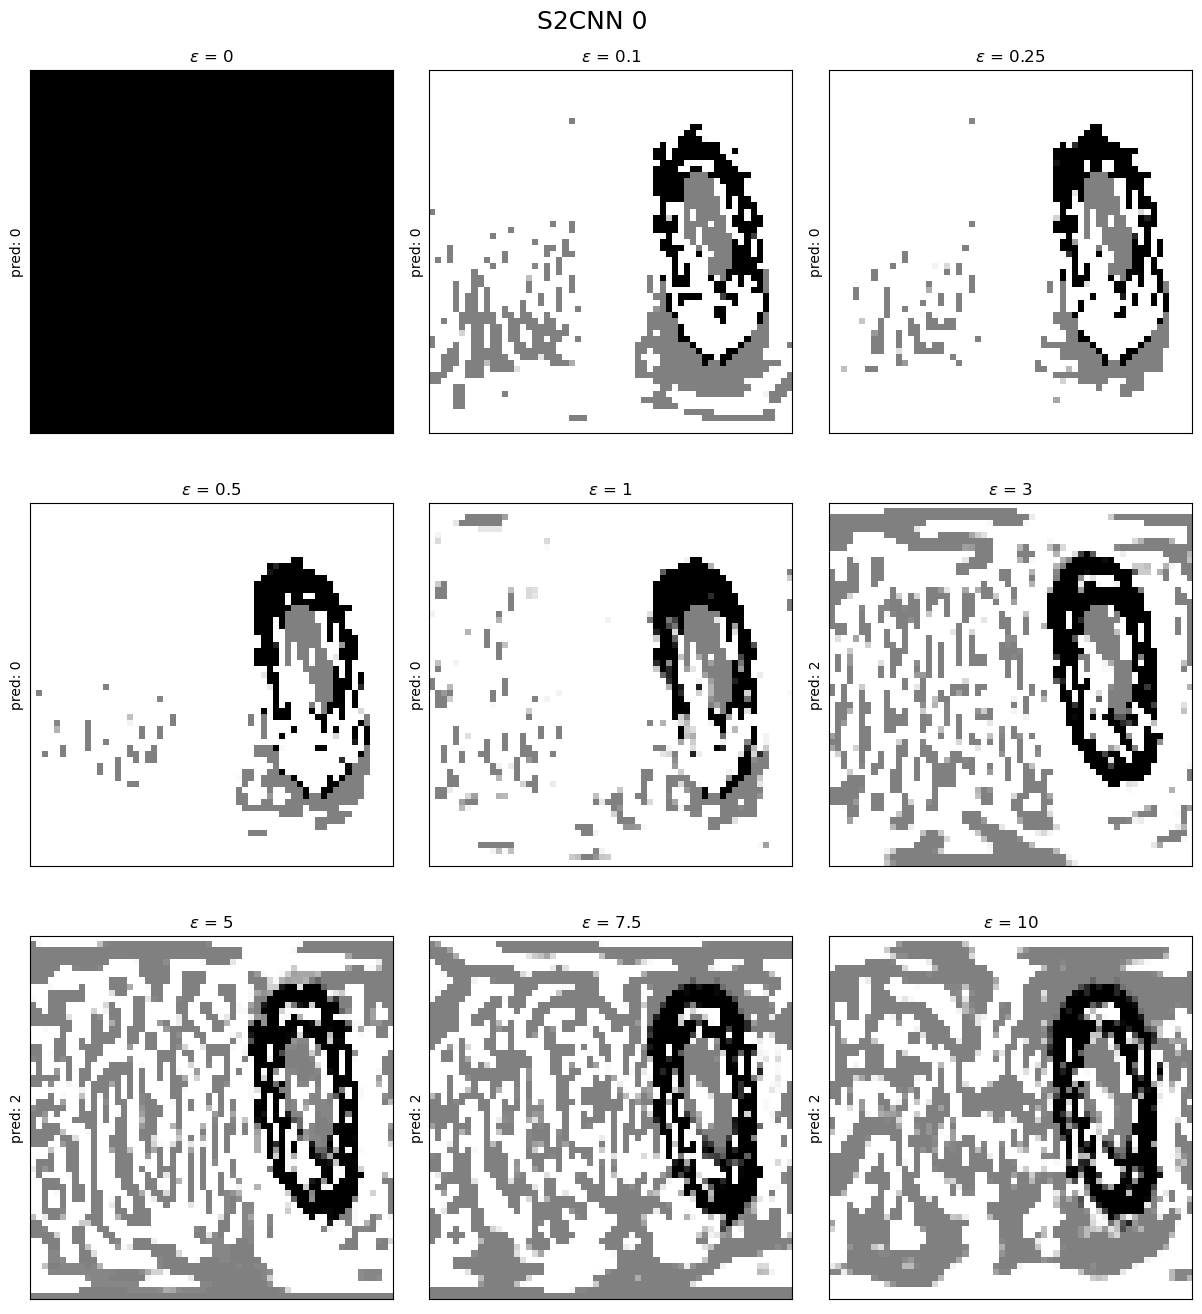

In [50]:
show_differences(S2CNN_images, S2CNN_params, S2CNN_preds, 0, 2, title='S2CNN', vmin=None, vmax=None)

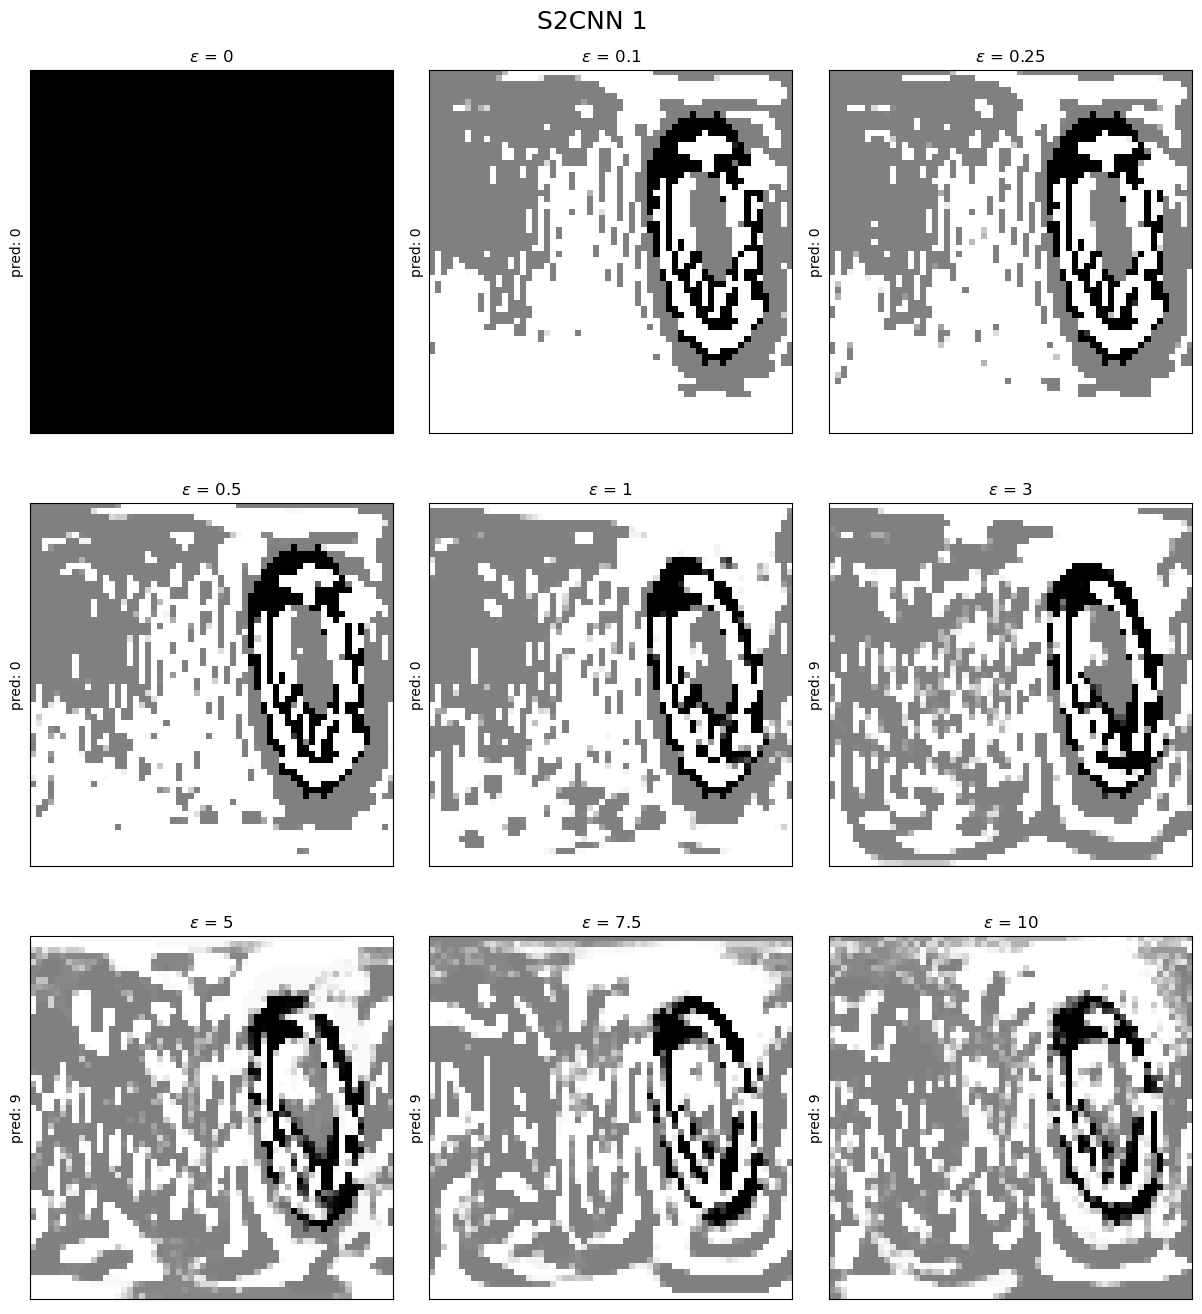

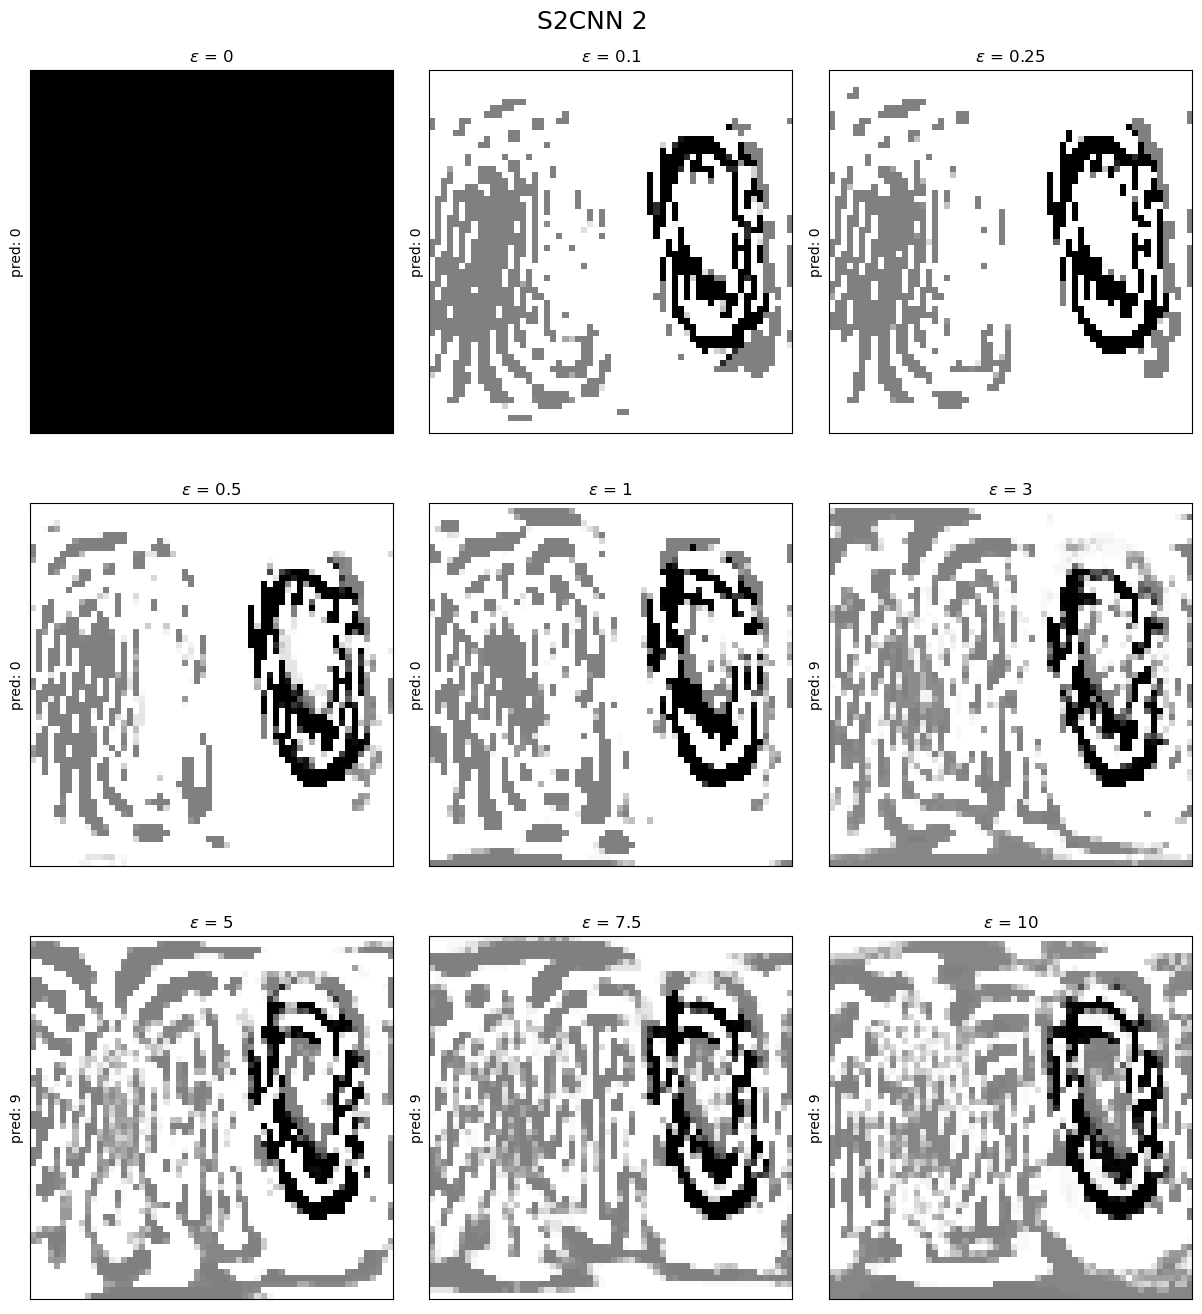

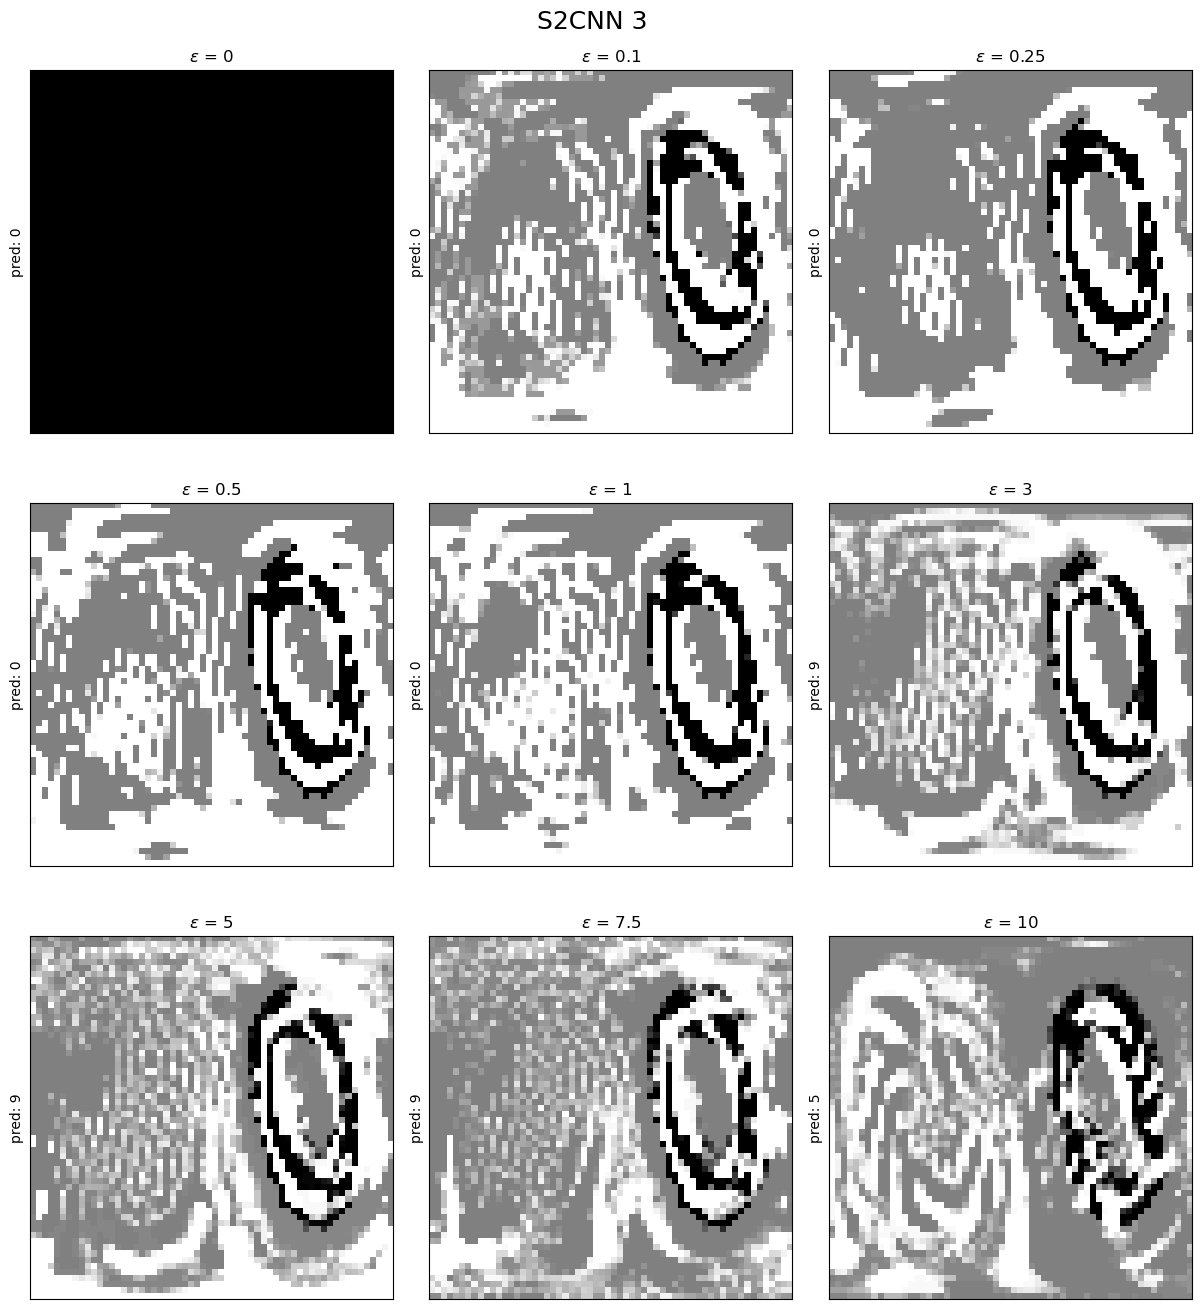

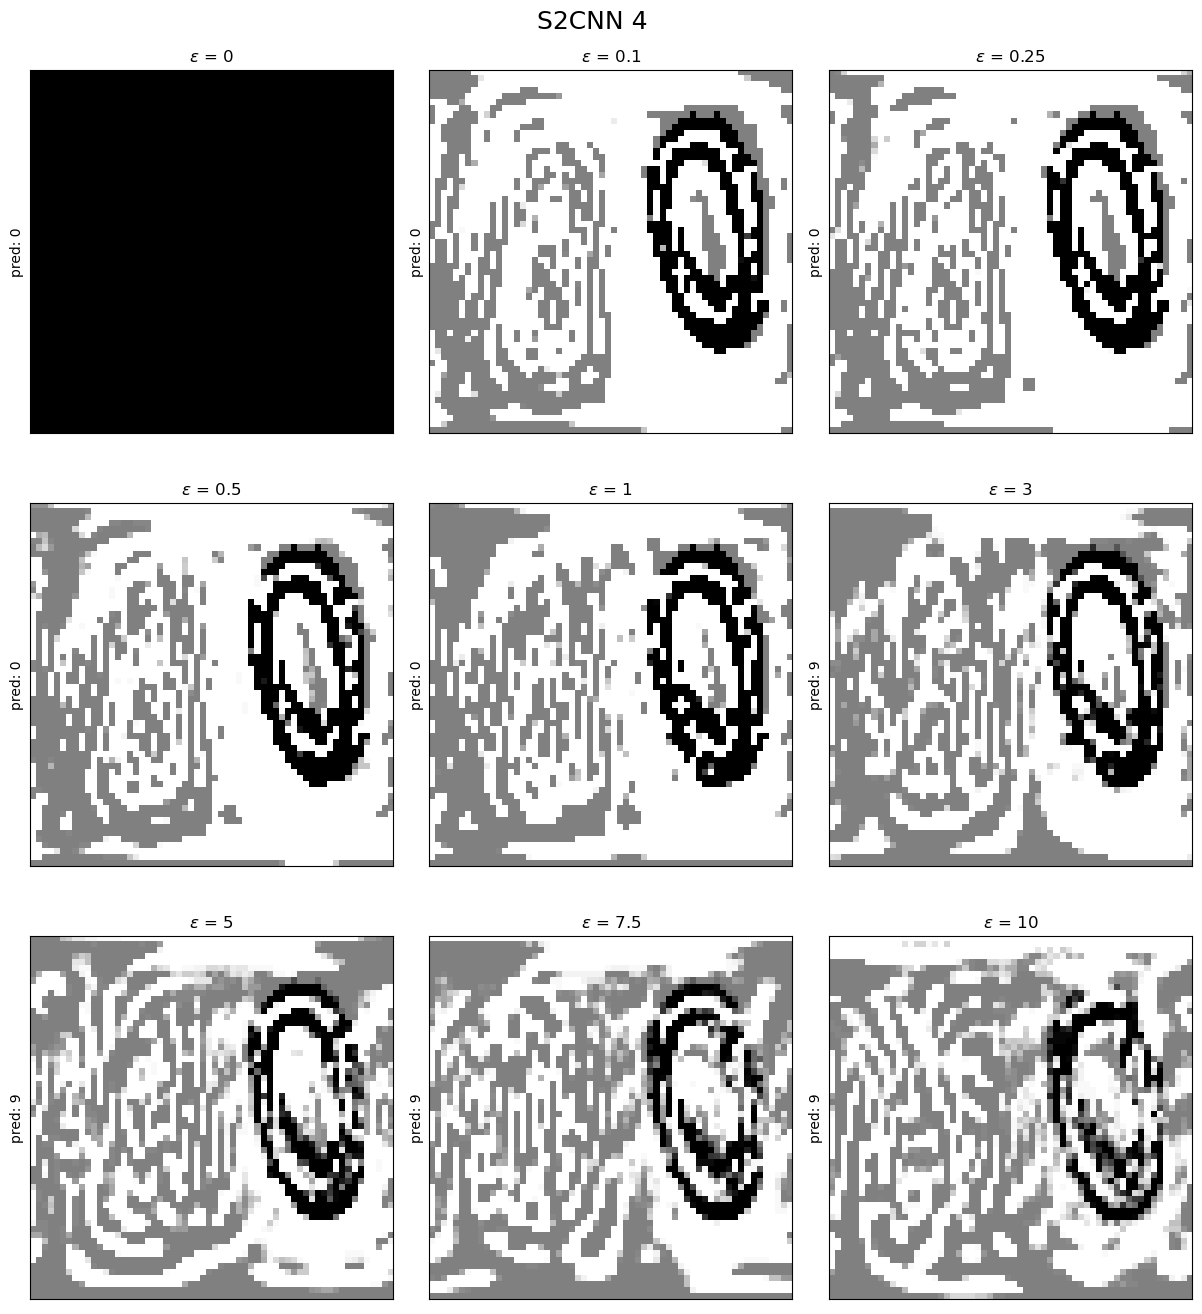

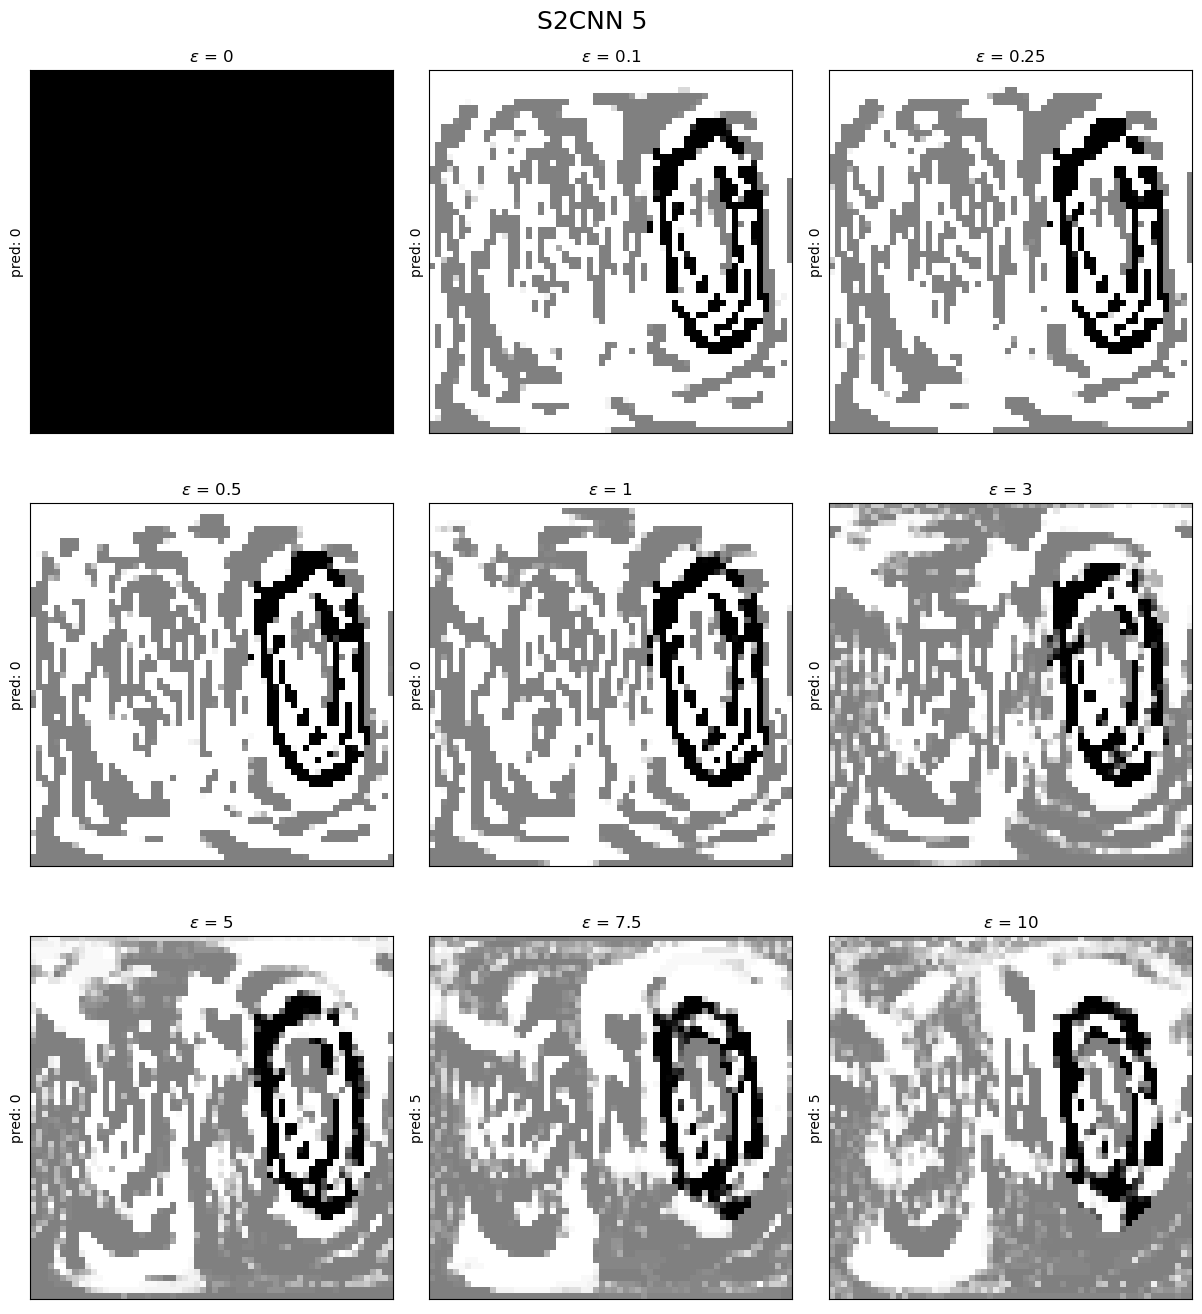

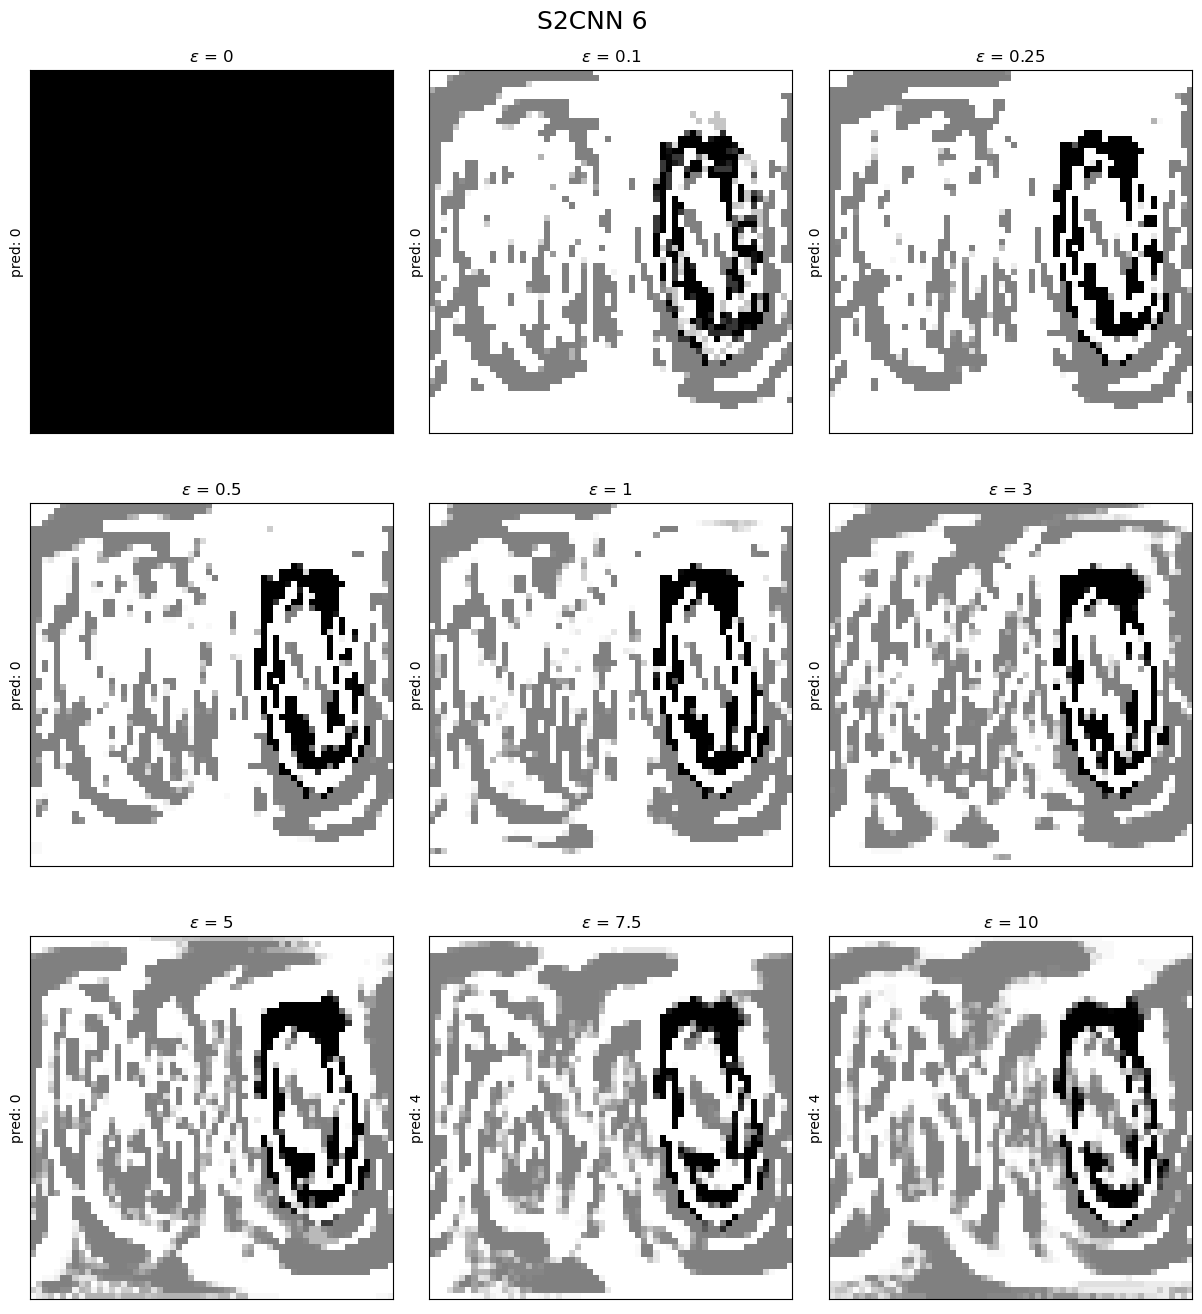

In [51]:
for i in range(1,7):
    show_differences(S2CNN_images, S2CNN_params, S2CNN_preds, i, 2, title='S2CNN', vmin=None, vmax=None)